In [2]:
%pip install pandas

You should consider upgrading via the 'c:\data\innopolis\innopolis_labs\lr10_gradient_boosting_random_forest\venv\Scripts\python.exe -m pip install --upgrade pip' command.



  Using cached pandas-2.0.1-cp310-cp310-win_amd64.whl (10.7 MB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached numpy-1.24.3-cp310-cp310-win_amd64.whl (14.8 MB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)


In [3]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Collecting matplotlib
  Using cached matplotlib-3.7.1-cp310-cp310-win_amd64.whl (7.6 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.4.4-cp310-cp310-win_amd64.whl (55 kB)
  Using cached contourpy-1.0.7-cp310-cp310-win_amd64.whl (162 kB)
  Using cached Pillow-9.5.0-cp310-cp310-win_amd64.whl (2.5 MB)
  Using cached fonttools-4.39.4-py3-none-any.whl (1.0 MB)



You should consider upgrading via the 'c:\data\innopolis\innopolis_labs\lr10_gradient_boosting_random_forest\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
%pip install seaborn 

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\data\innopolis\innopolis_labs\lr10_gradient_boosting_random_forest\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [5]:
%pip install scikit-learn


  Using cached scikit_learn-1.2.2-cp310-cp310-win_amd64.whl (8.3 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached scipy-1.10.1-cp310-cp310-win_amd64.whl (42.5 MB)


You should consider upgrading via the 'c:\data\innopolis\innopolis_labs\lr10_gradient_boosting_random_forest\venv\Scripts\python.exe -m pip install --upgrade pip' command.


##  Используйте метод Градиентного Бустинга для данных diabetes.csv
## Здесь - выходящей меткой (учителем) является столбец / атрибут - outcome.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv('diabetes.csv')

X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, y_pred)}')

accuracy: 0.7467532467532467


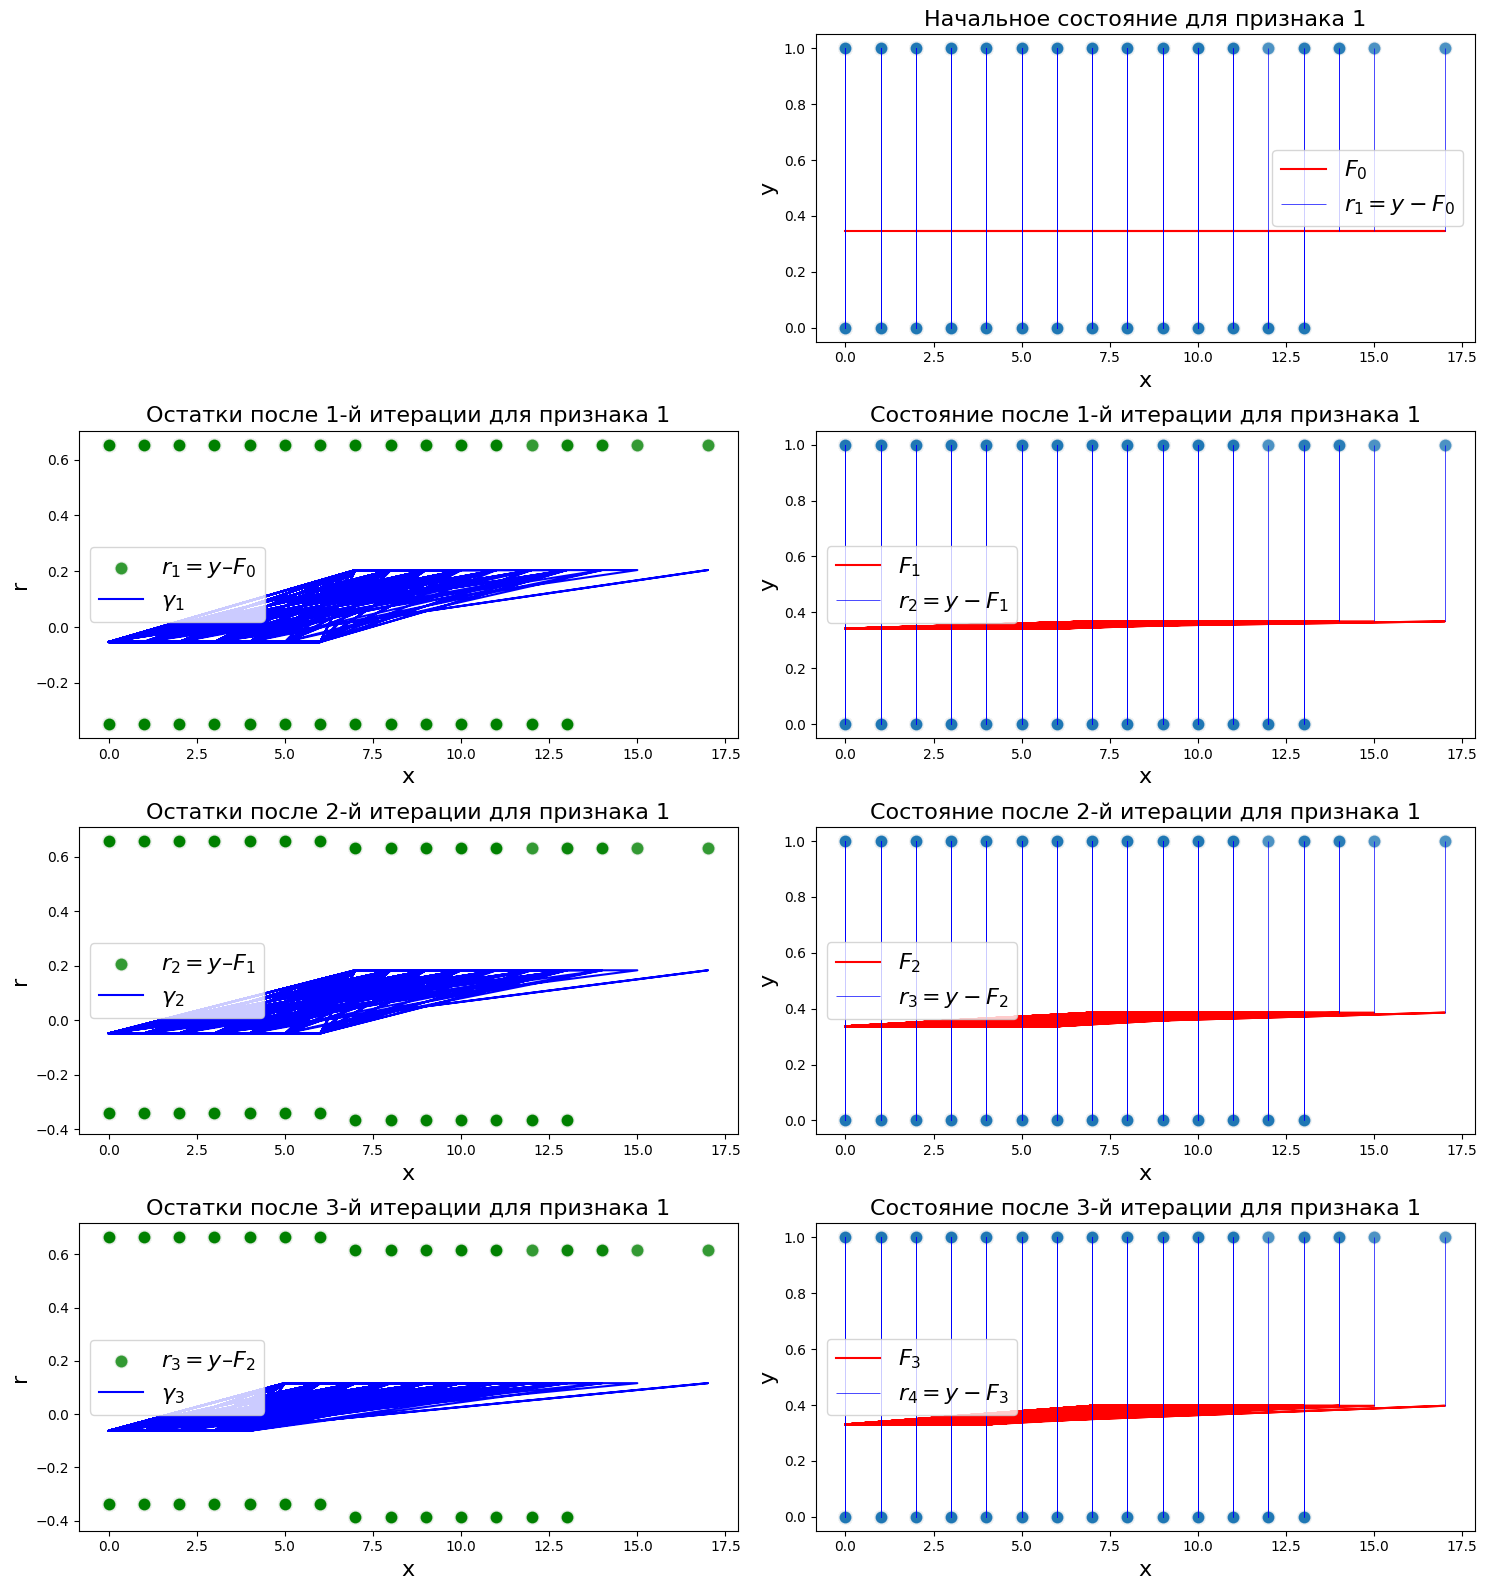

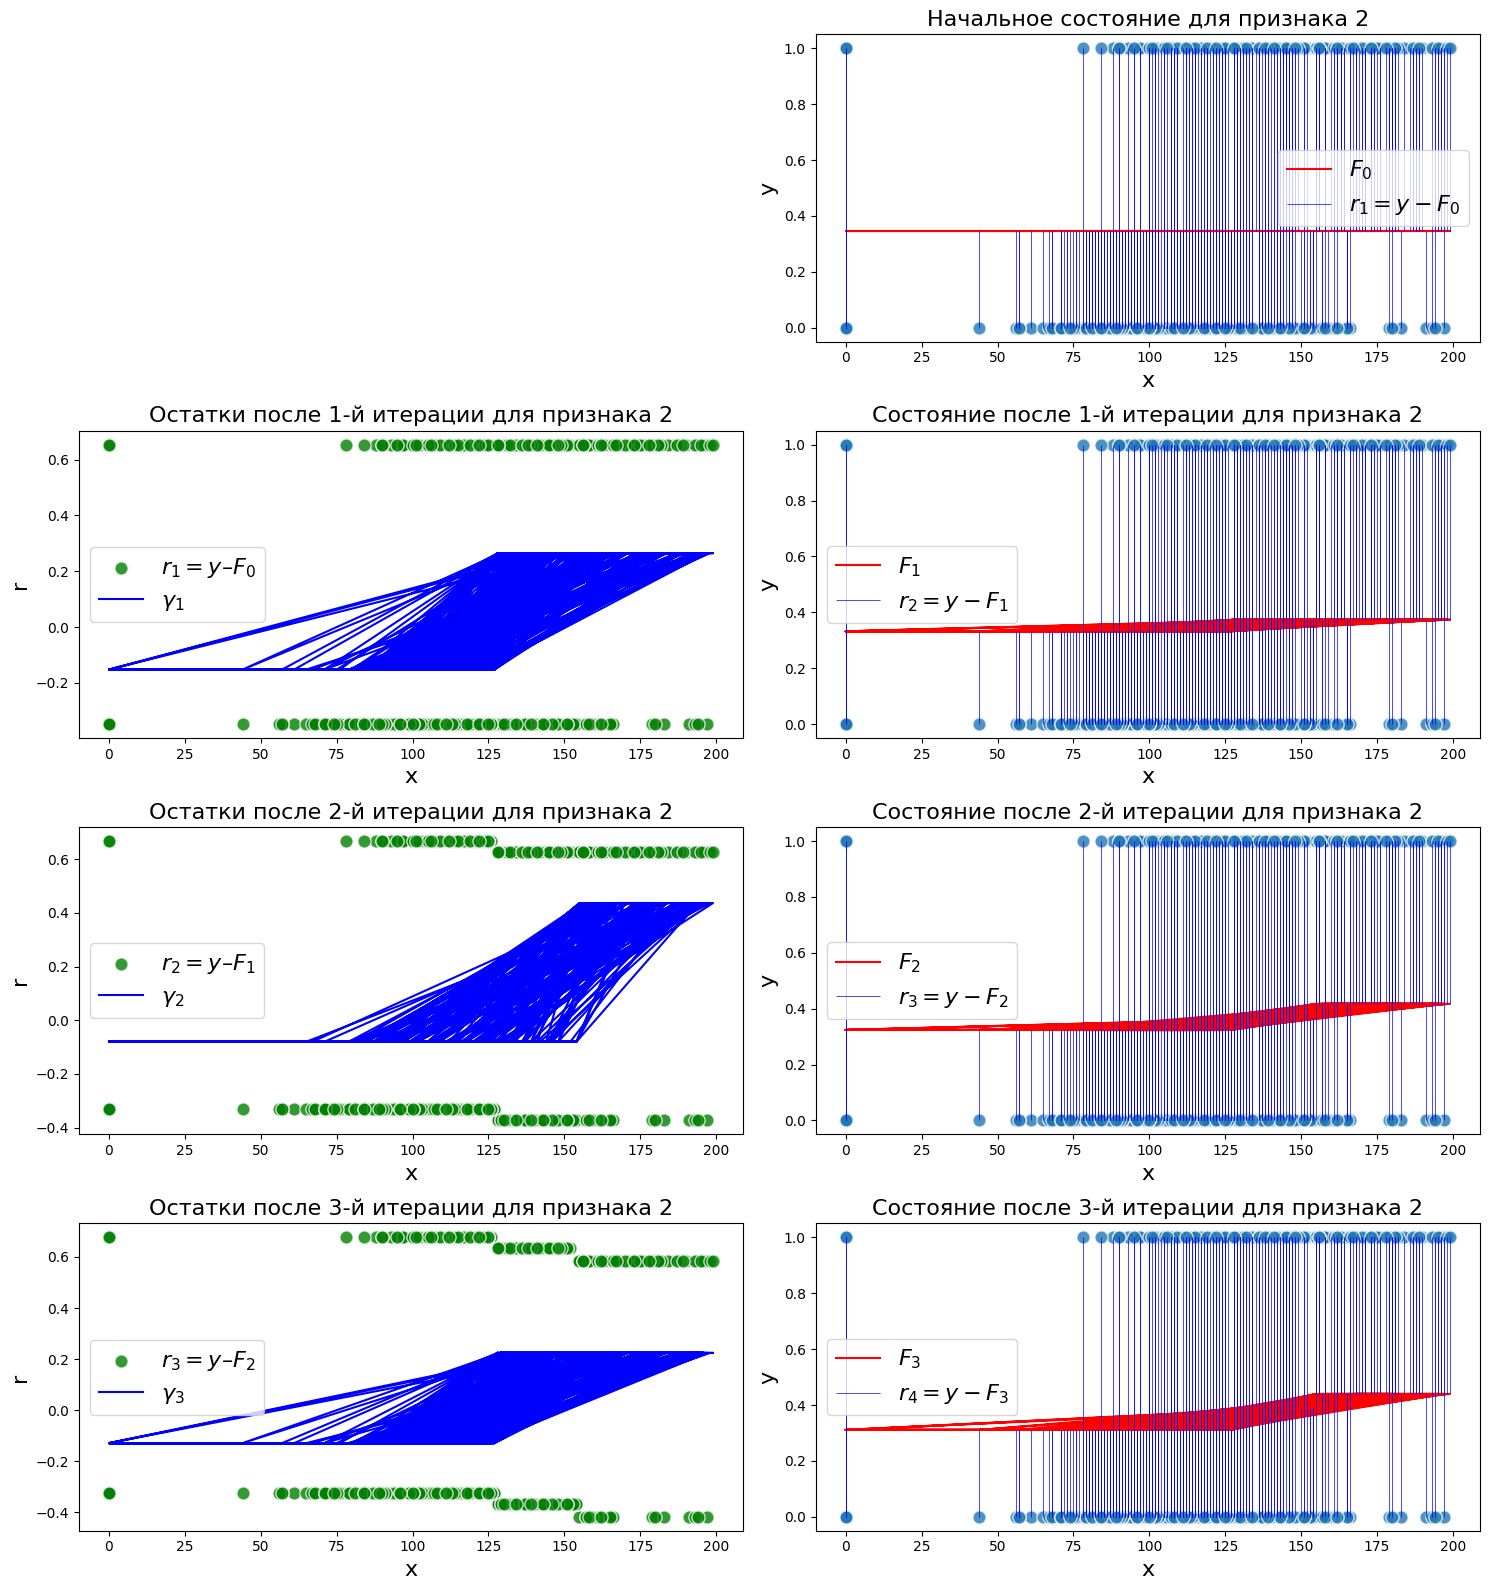

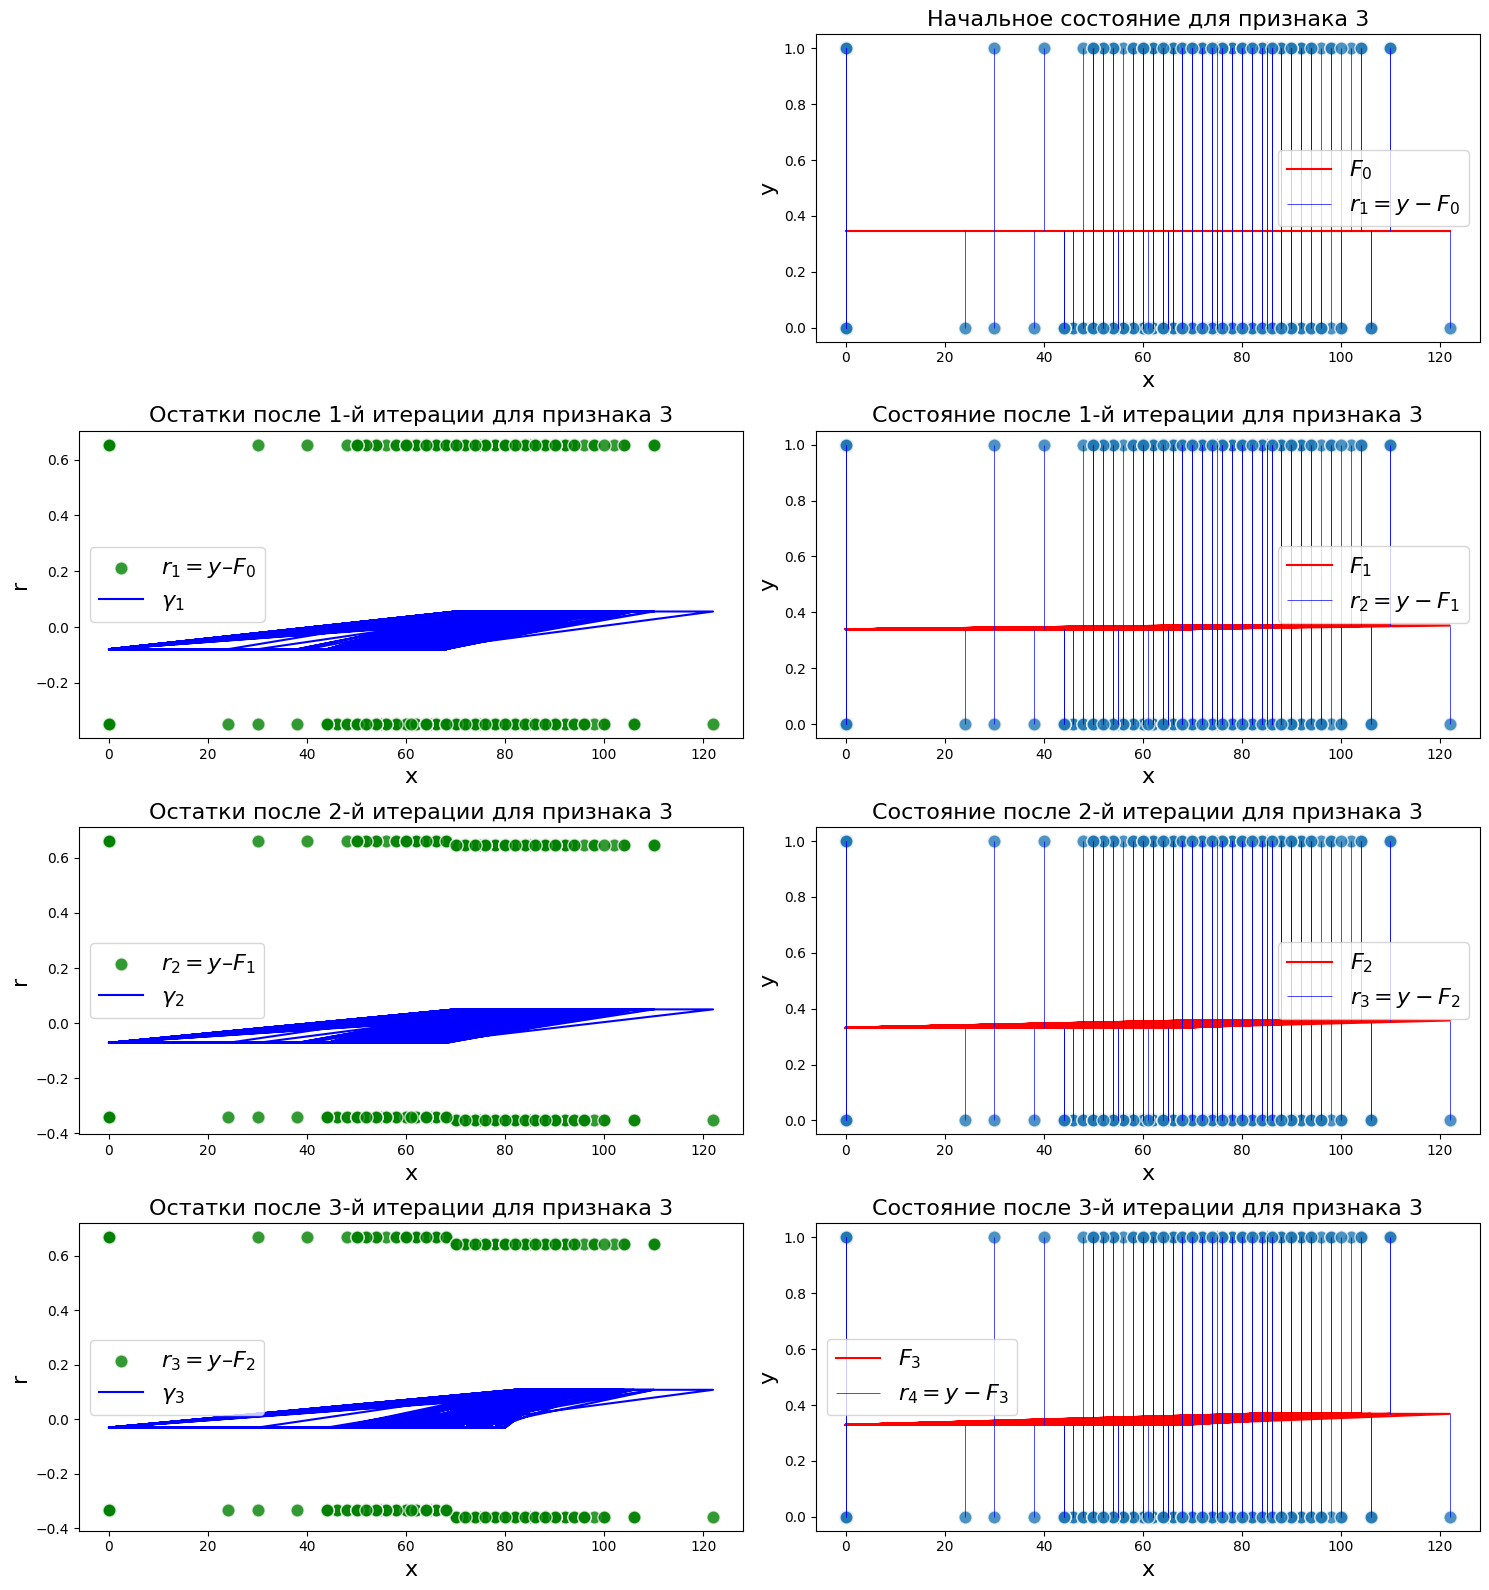

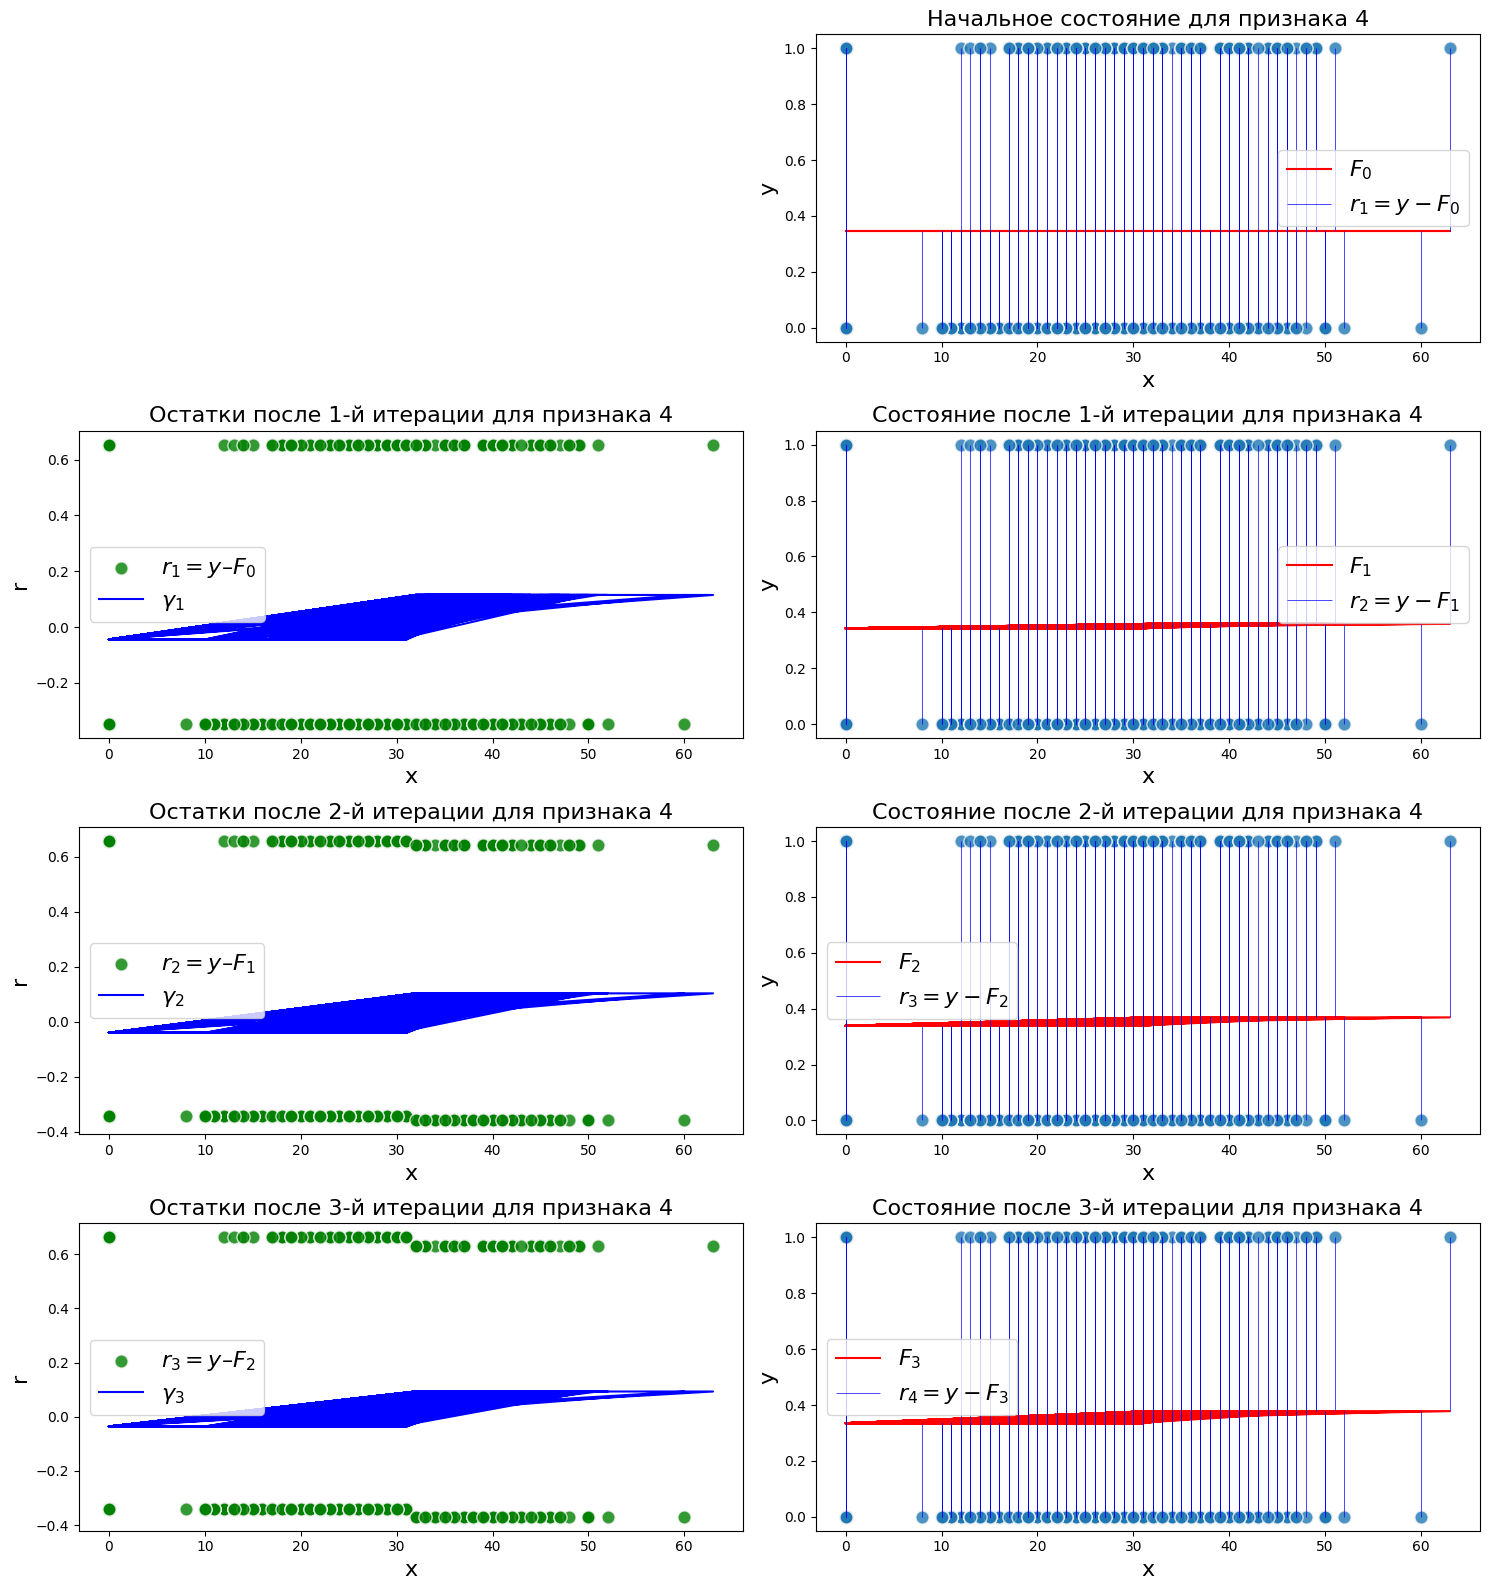

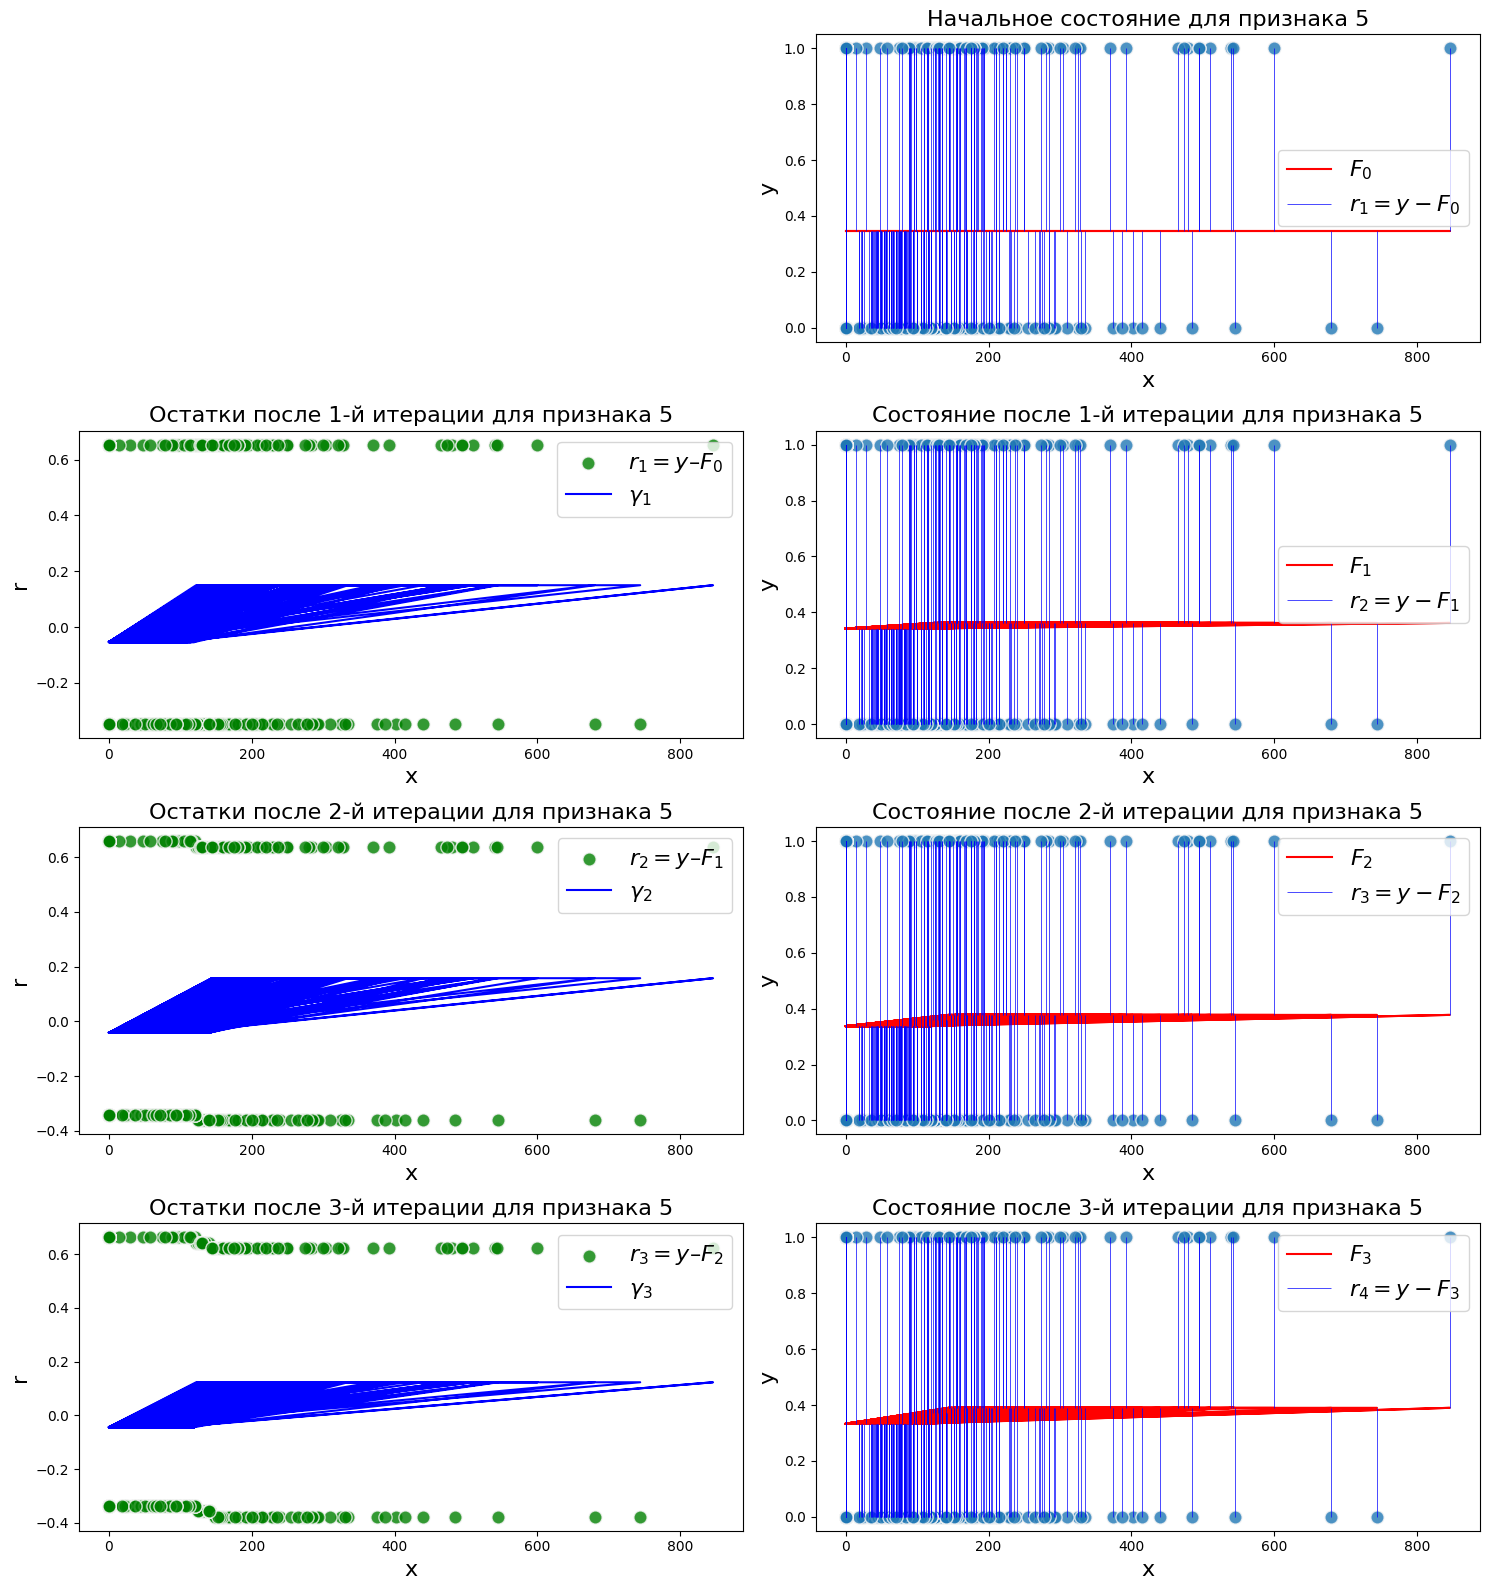

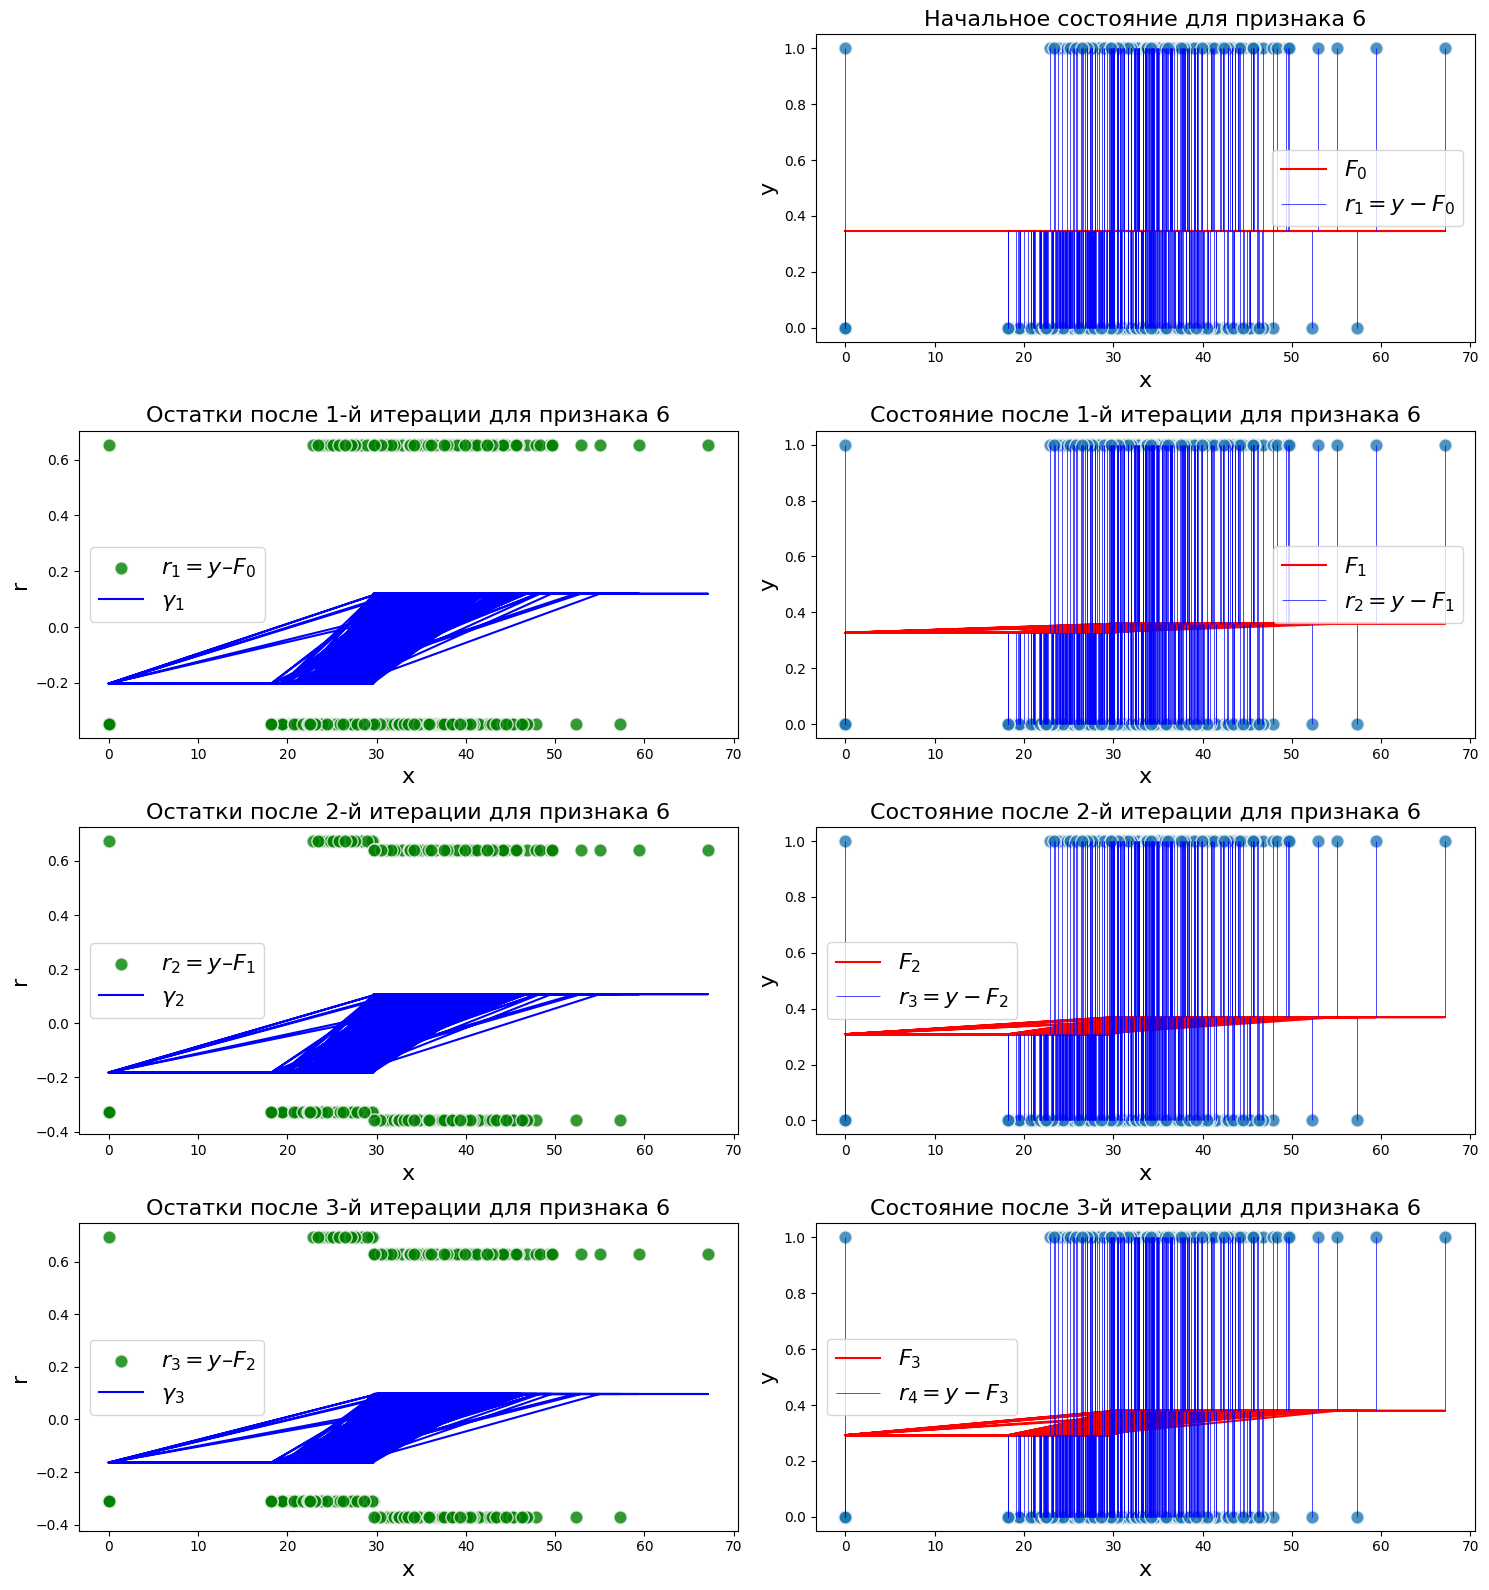

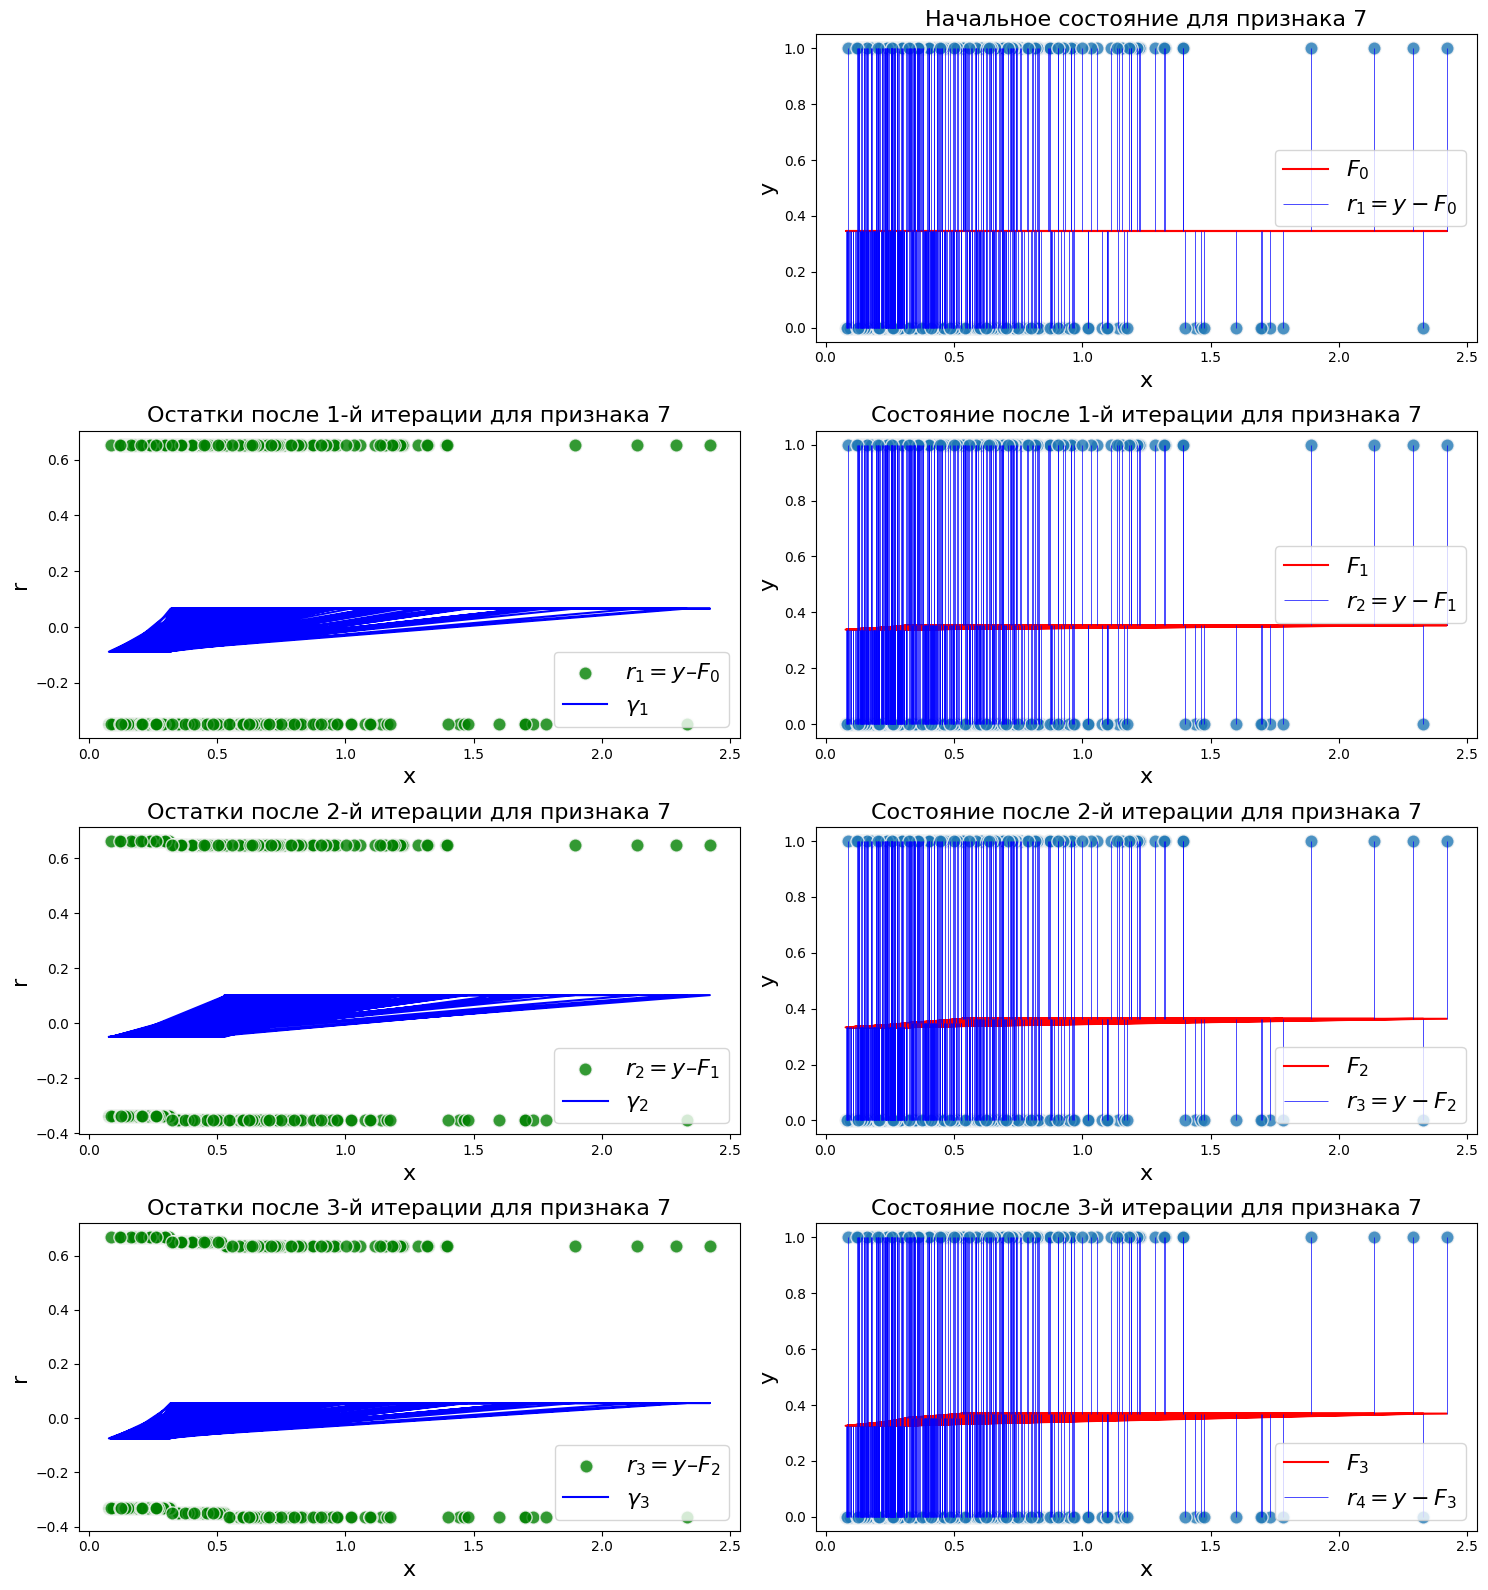

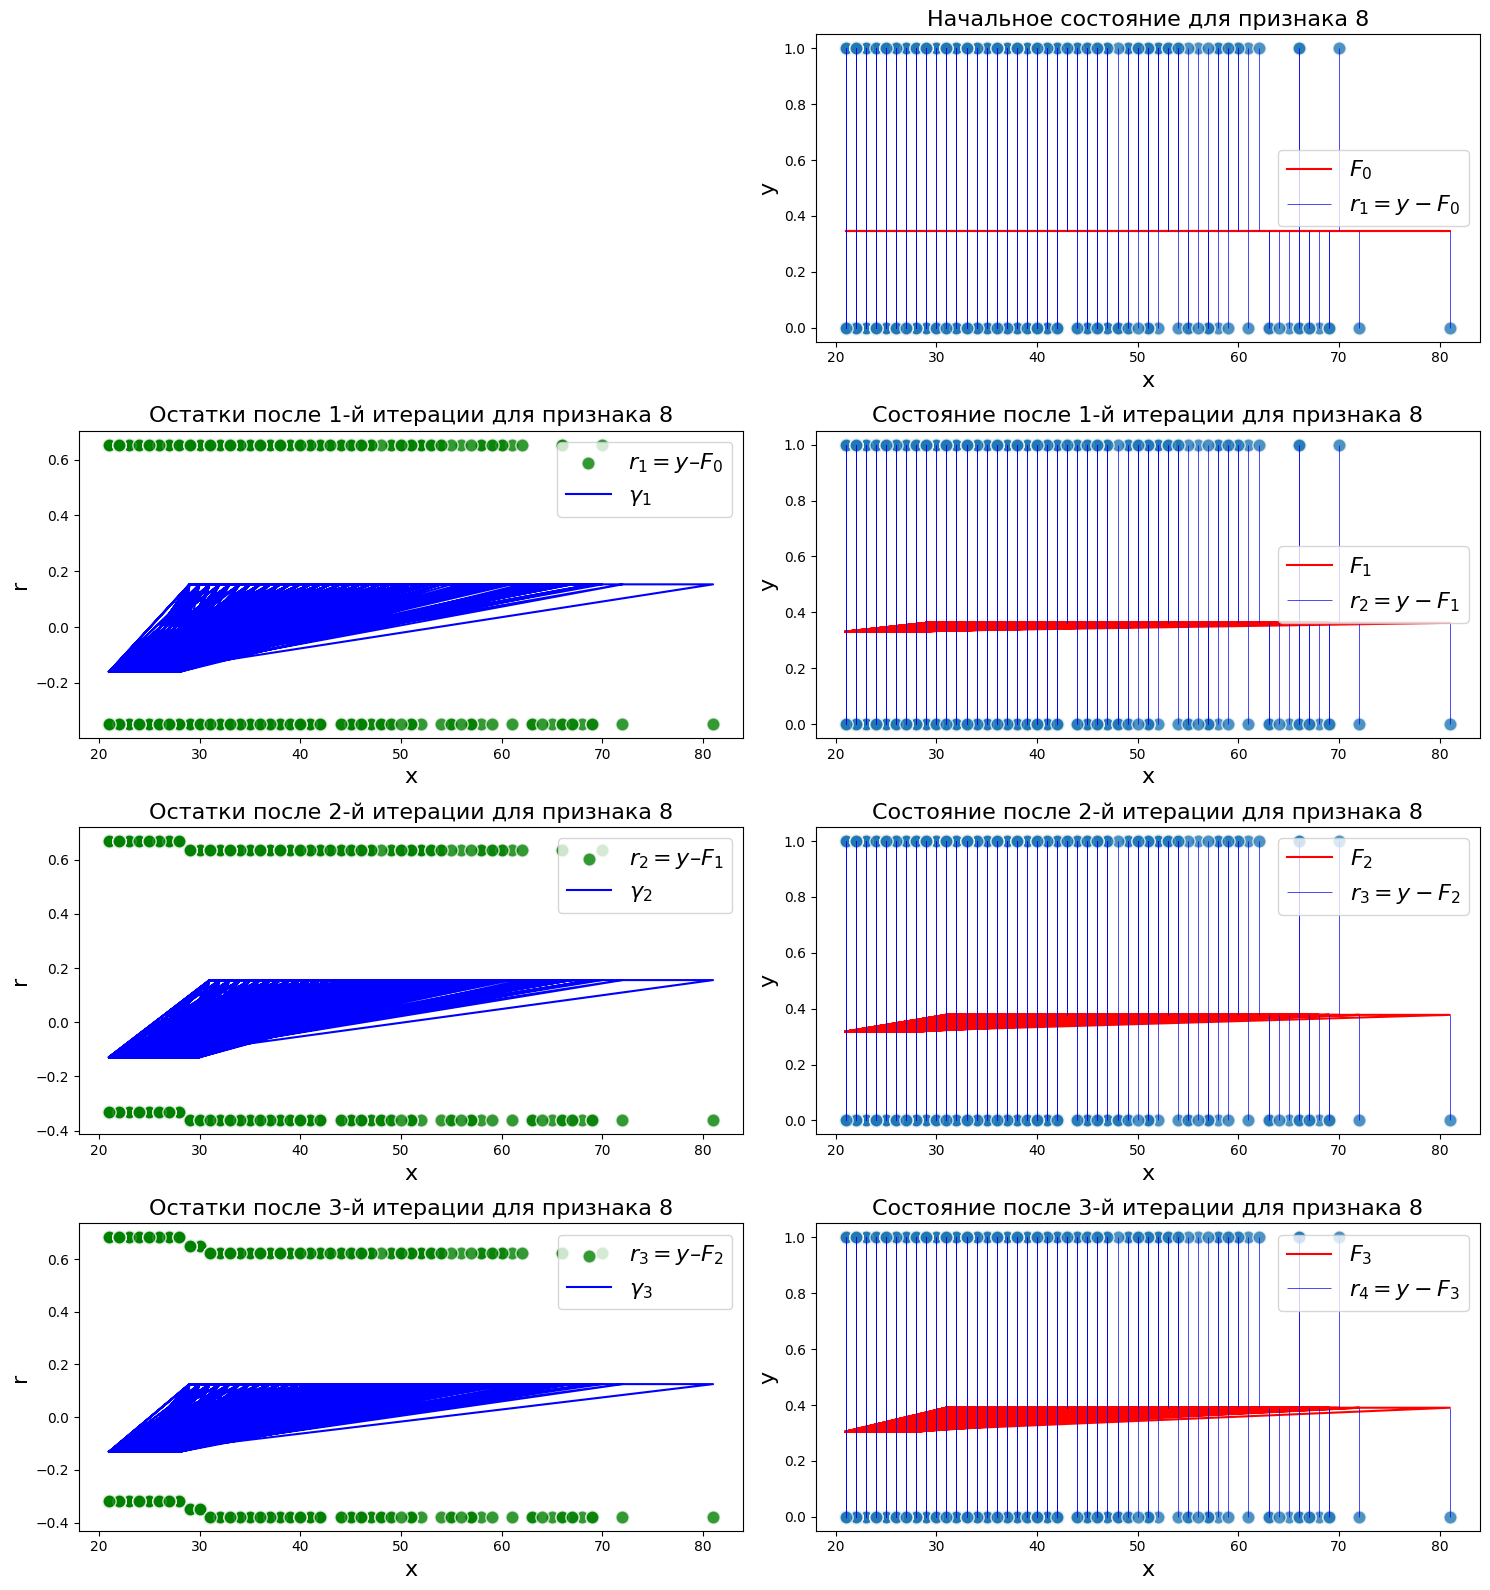

In [19]:
for i in range(X_train.shape[1]):
    x = X_train[:, i].reshape(-1, 1)  # Преобразуем x в двумерный массив
    y = y_train

    # обучение и обновление
    Fm_pre = Fm = np.full(len(y), y.mean())

    n_estimators = 3
    
    fig, axs = plt.subplots(n_estimators+1, 2, figsize=(15, 4*(n_estimators+1)))
    axs = axs.flatten()
    axs[0].axis('off')
    plot_residuals(x, y, Fm, 0, axs[1], title=f"Начальное состояние для признака {i+1}")
    for j in range(n_estimators):
        tree, Fm, gamma, r = train_and_update(x, y, Fm, learning_rate=0.1)
        plot_gamma(x, r, gamma, j+1, axs[j*2+2], f"Остатки после {j+1}-й итерации для признака {i+1}")
        plot_residuals(x, y, Fm, j+1, axs[j*2+3], title=f"Состояние после {j+1}-й итерации для признака {i+1}")

    plt.tight_layout()
    plt.show()


## Используйте метод Random Forest для тех же самых данных и с той же самой меткой (учителем)

[[77 22]
 [21 34]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

0.7207792207792207


Text(0.5, 0, 'Относительная важность')

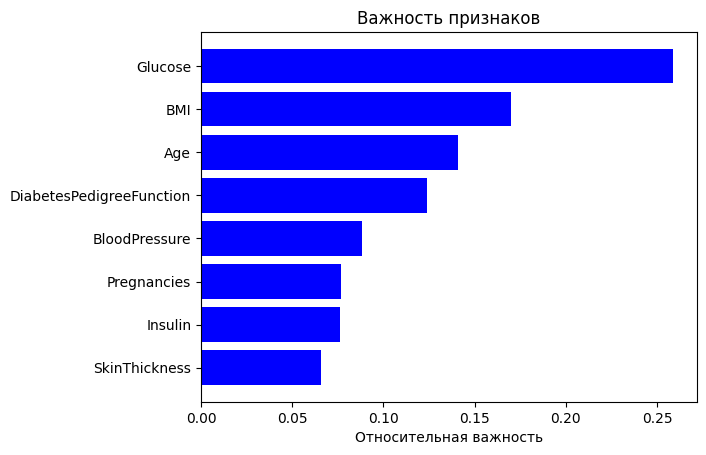

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes.csv')
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

importances = model.feature_importances_
indices = np.argsort(importances)
features = df.columns[:-1]

plt.figure(1)
plt.title('Важность признаков')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Относительная важность')


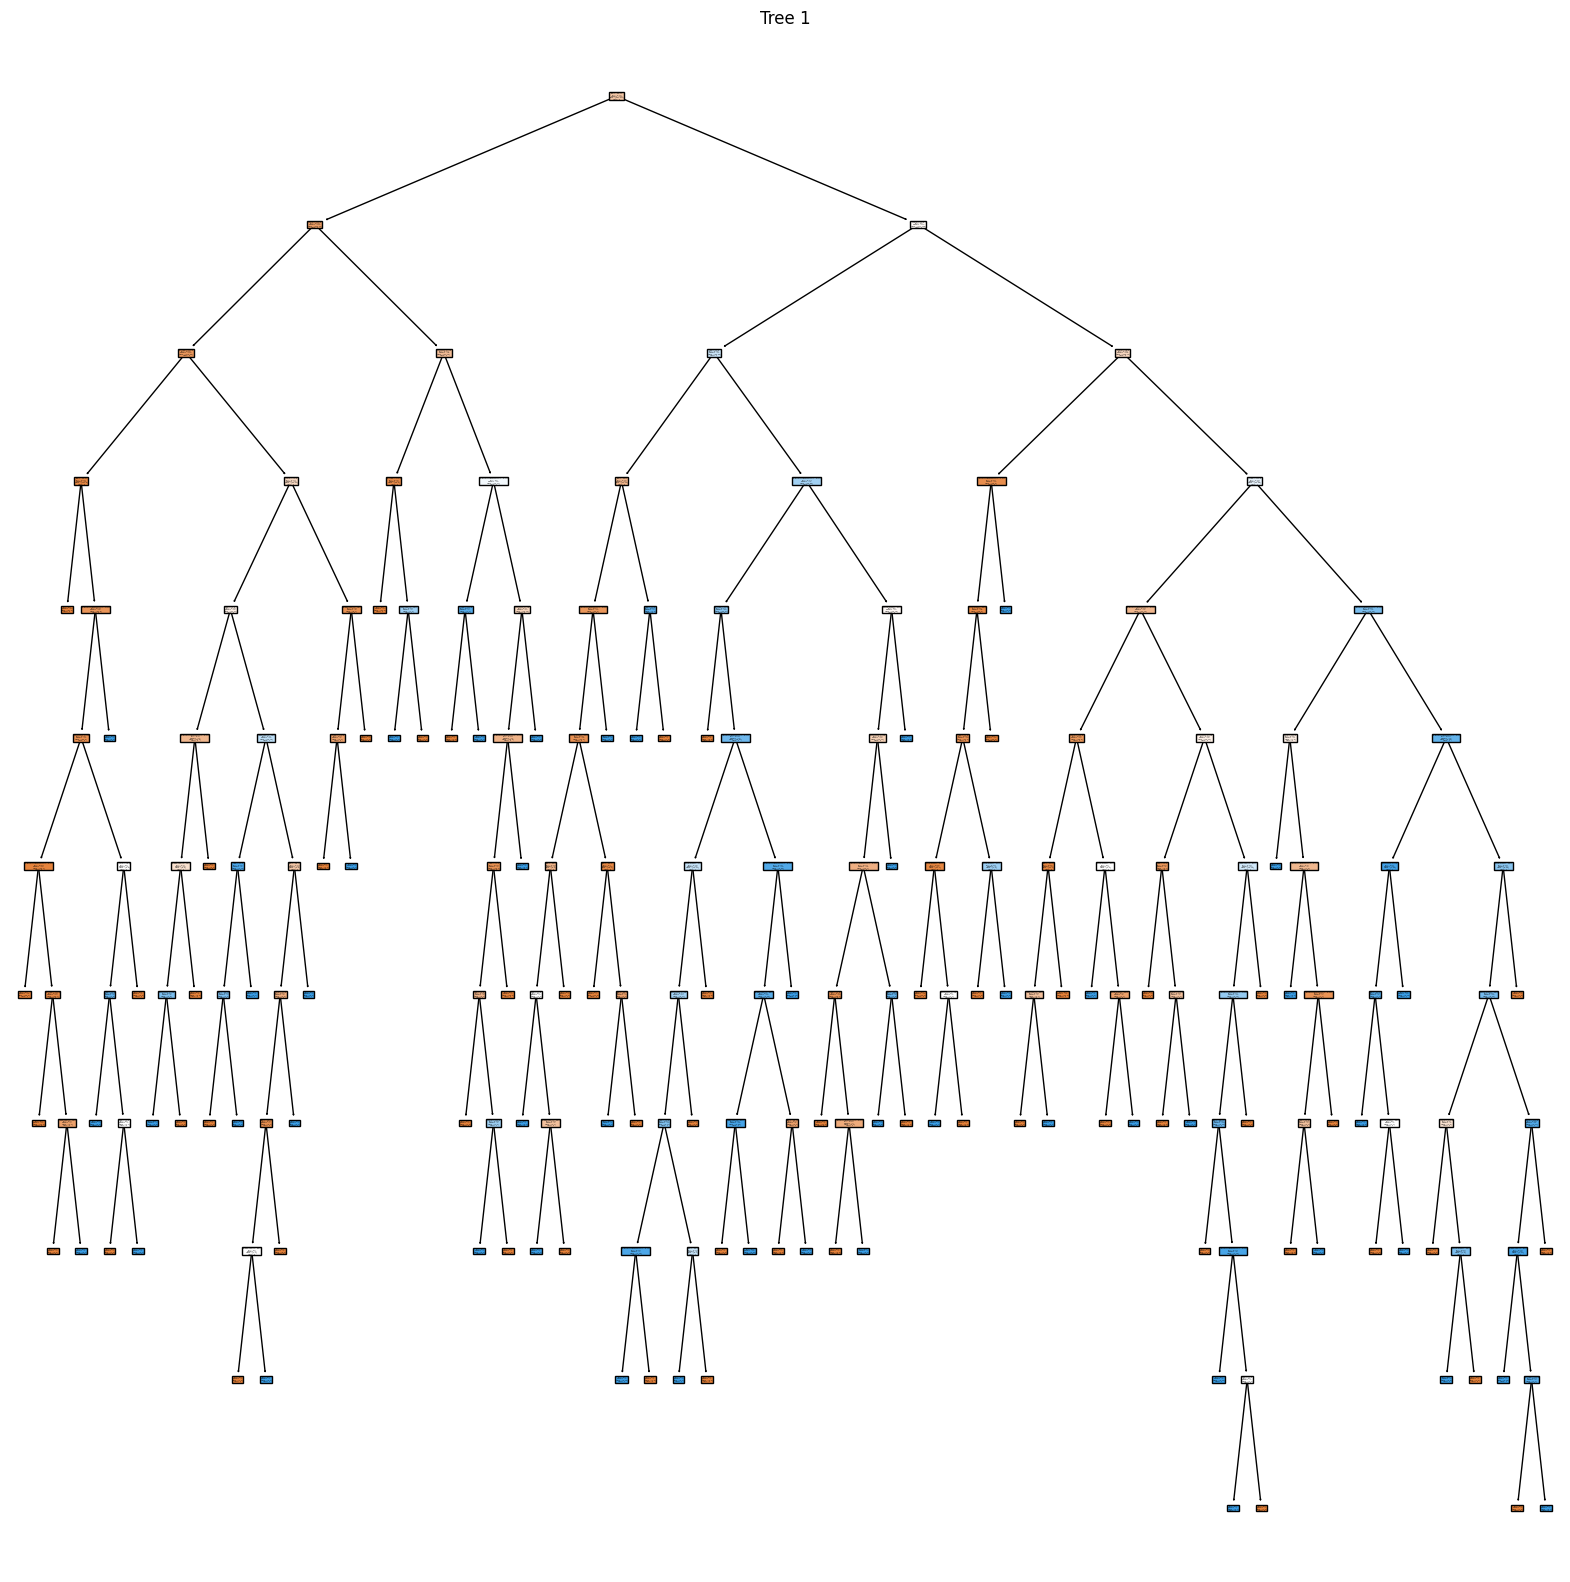

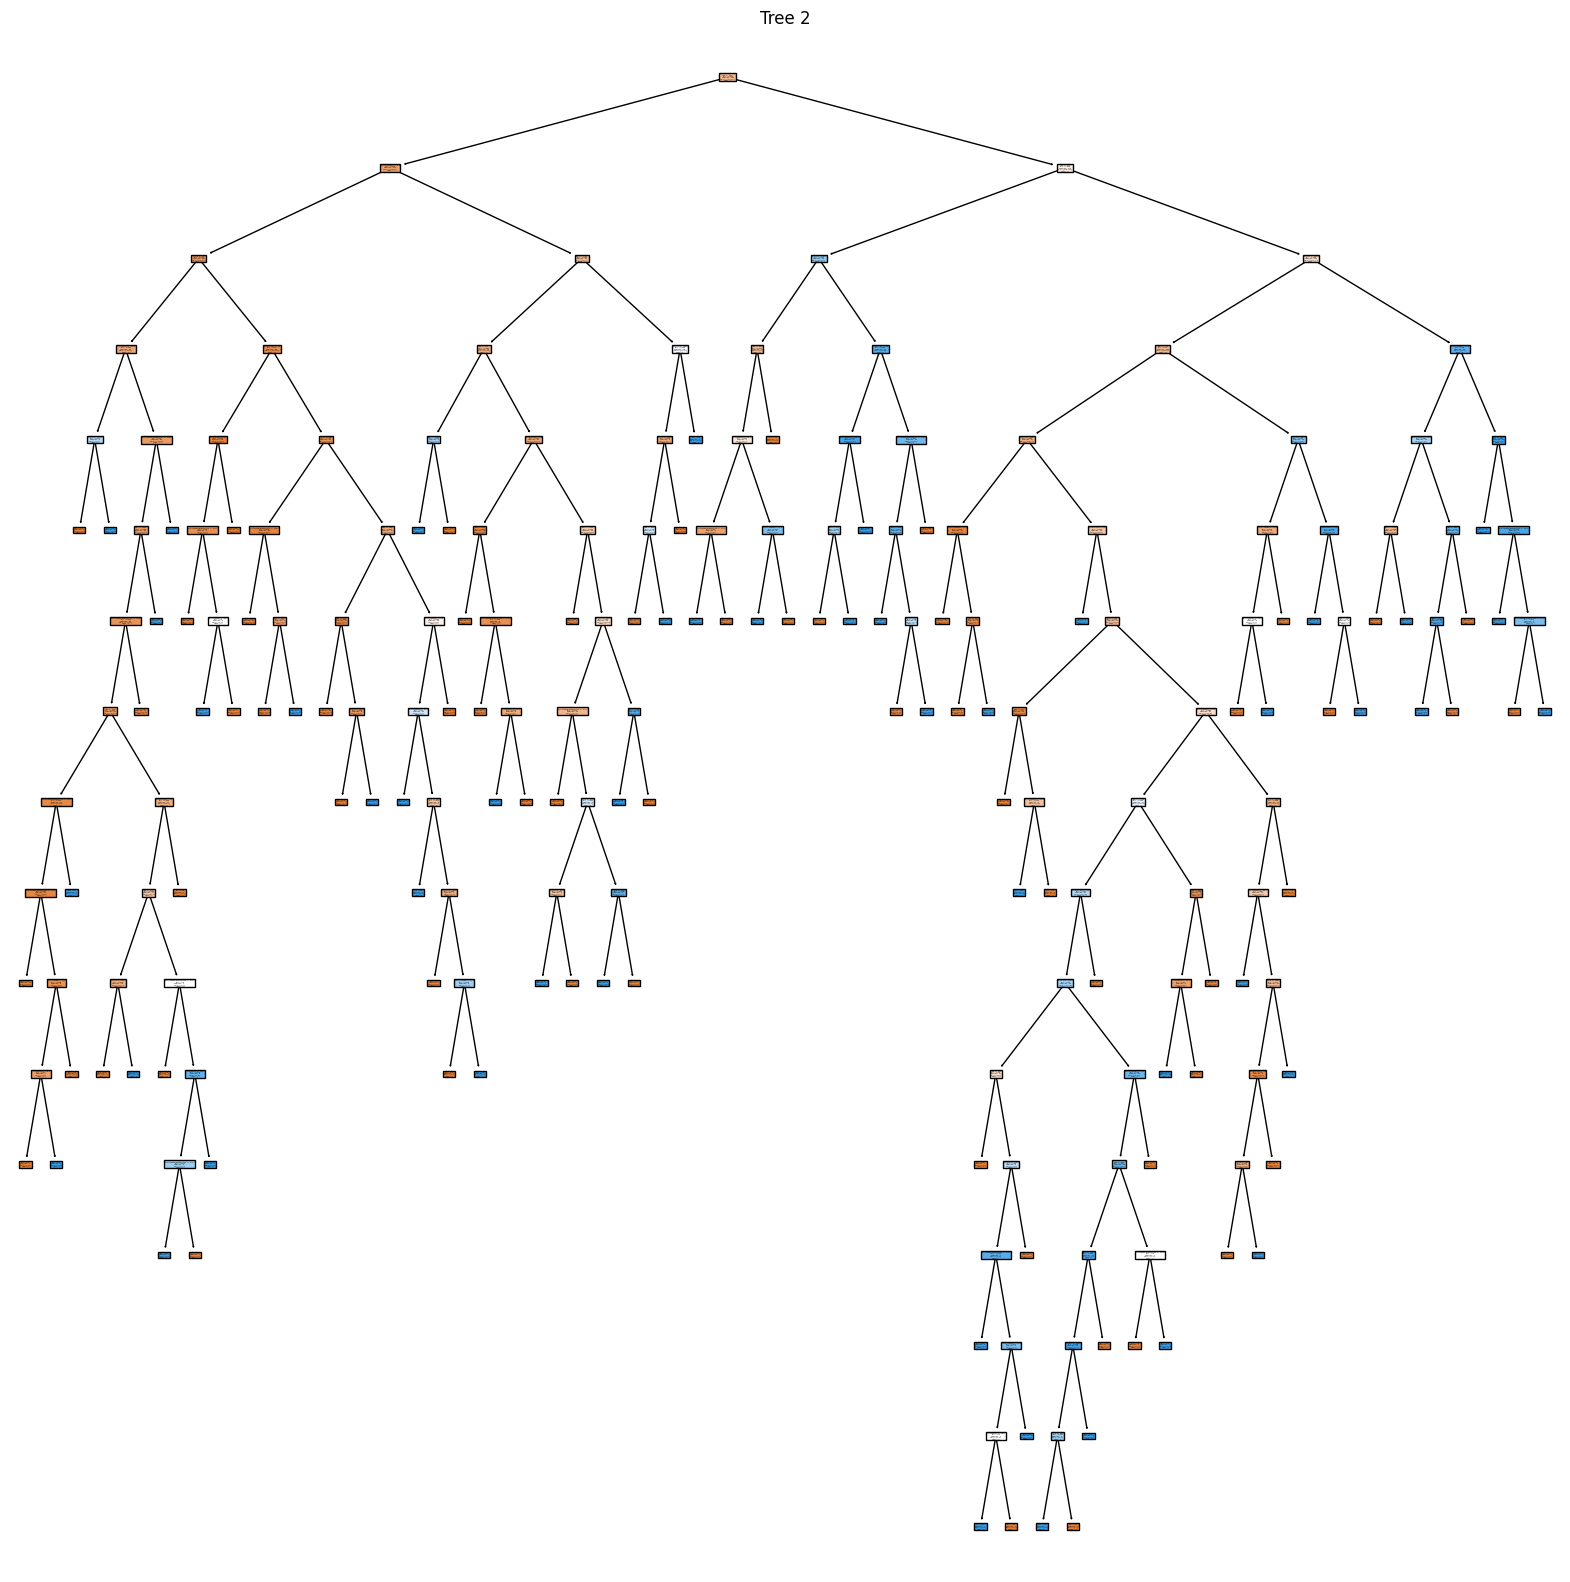

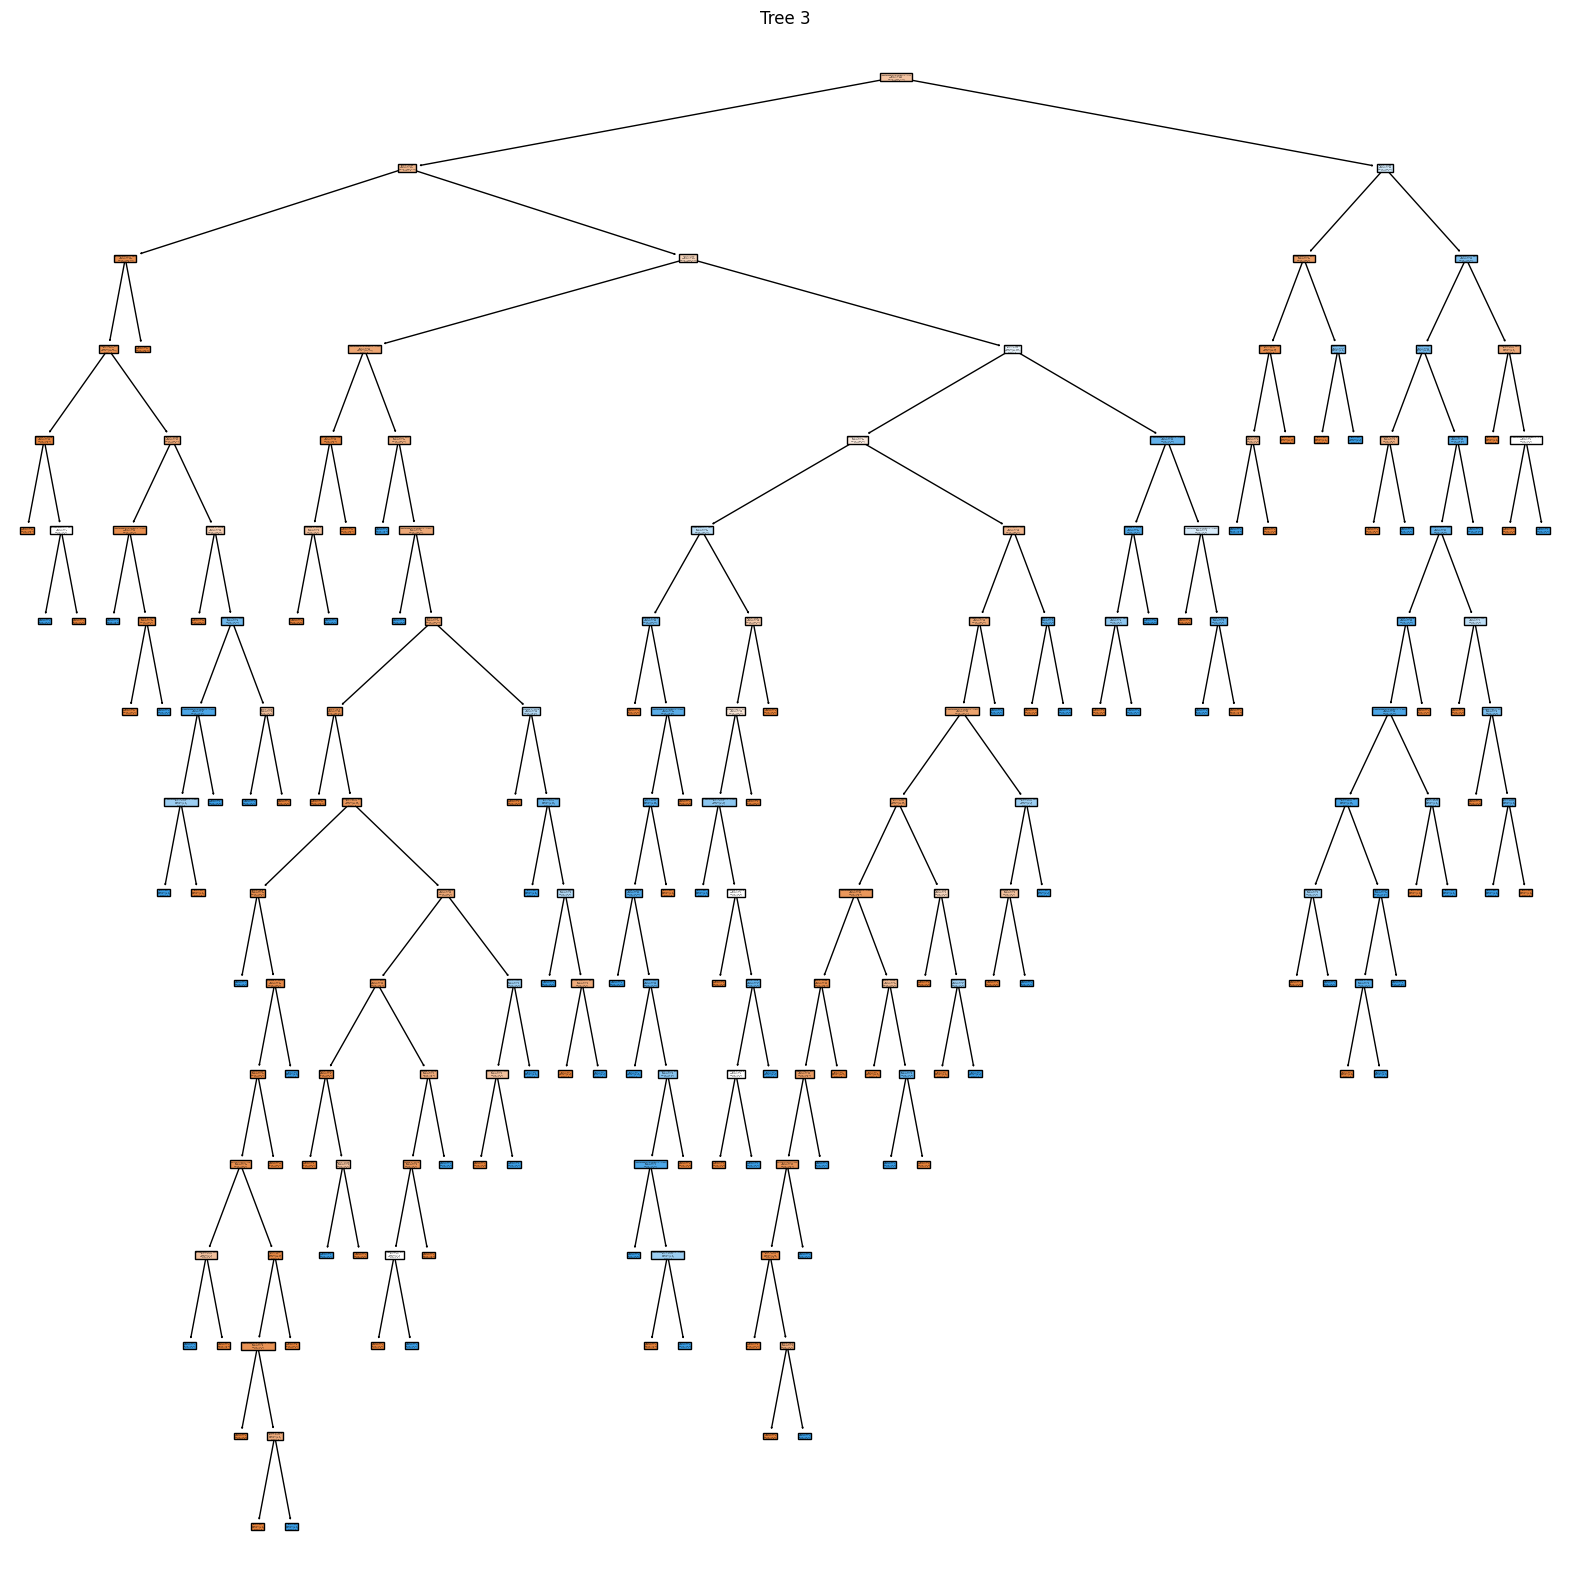

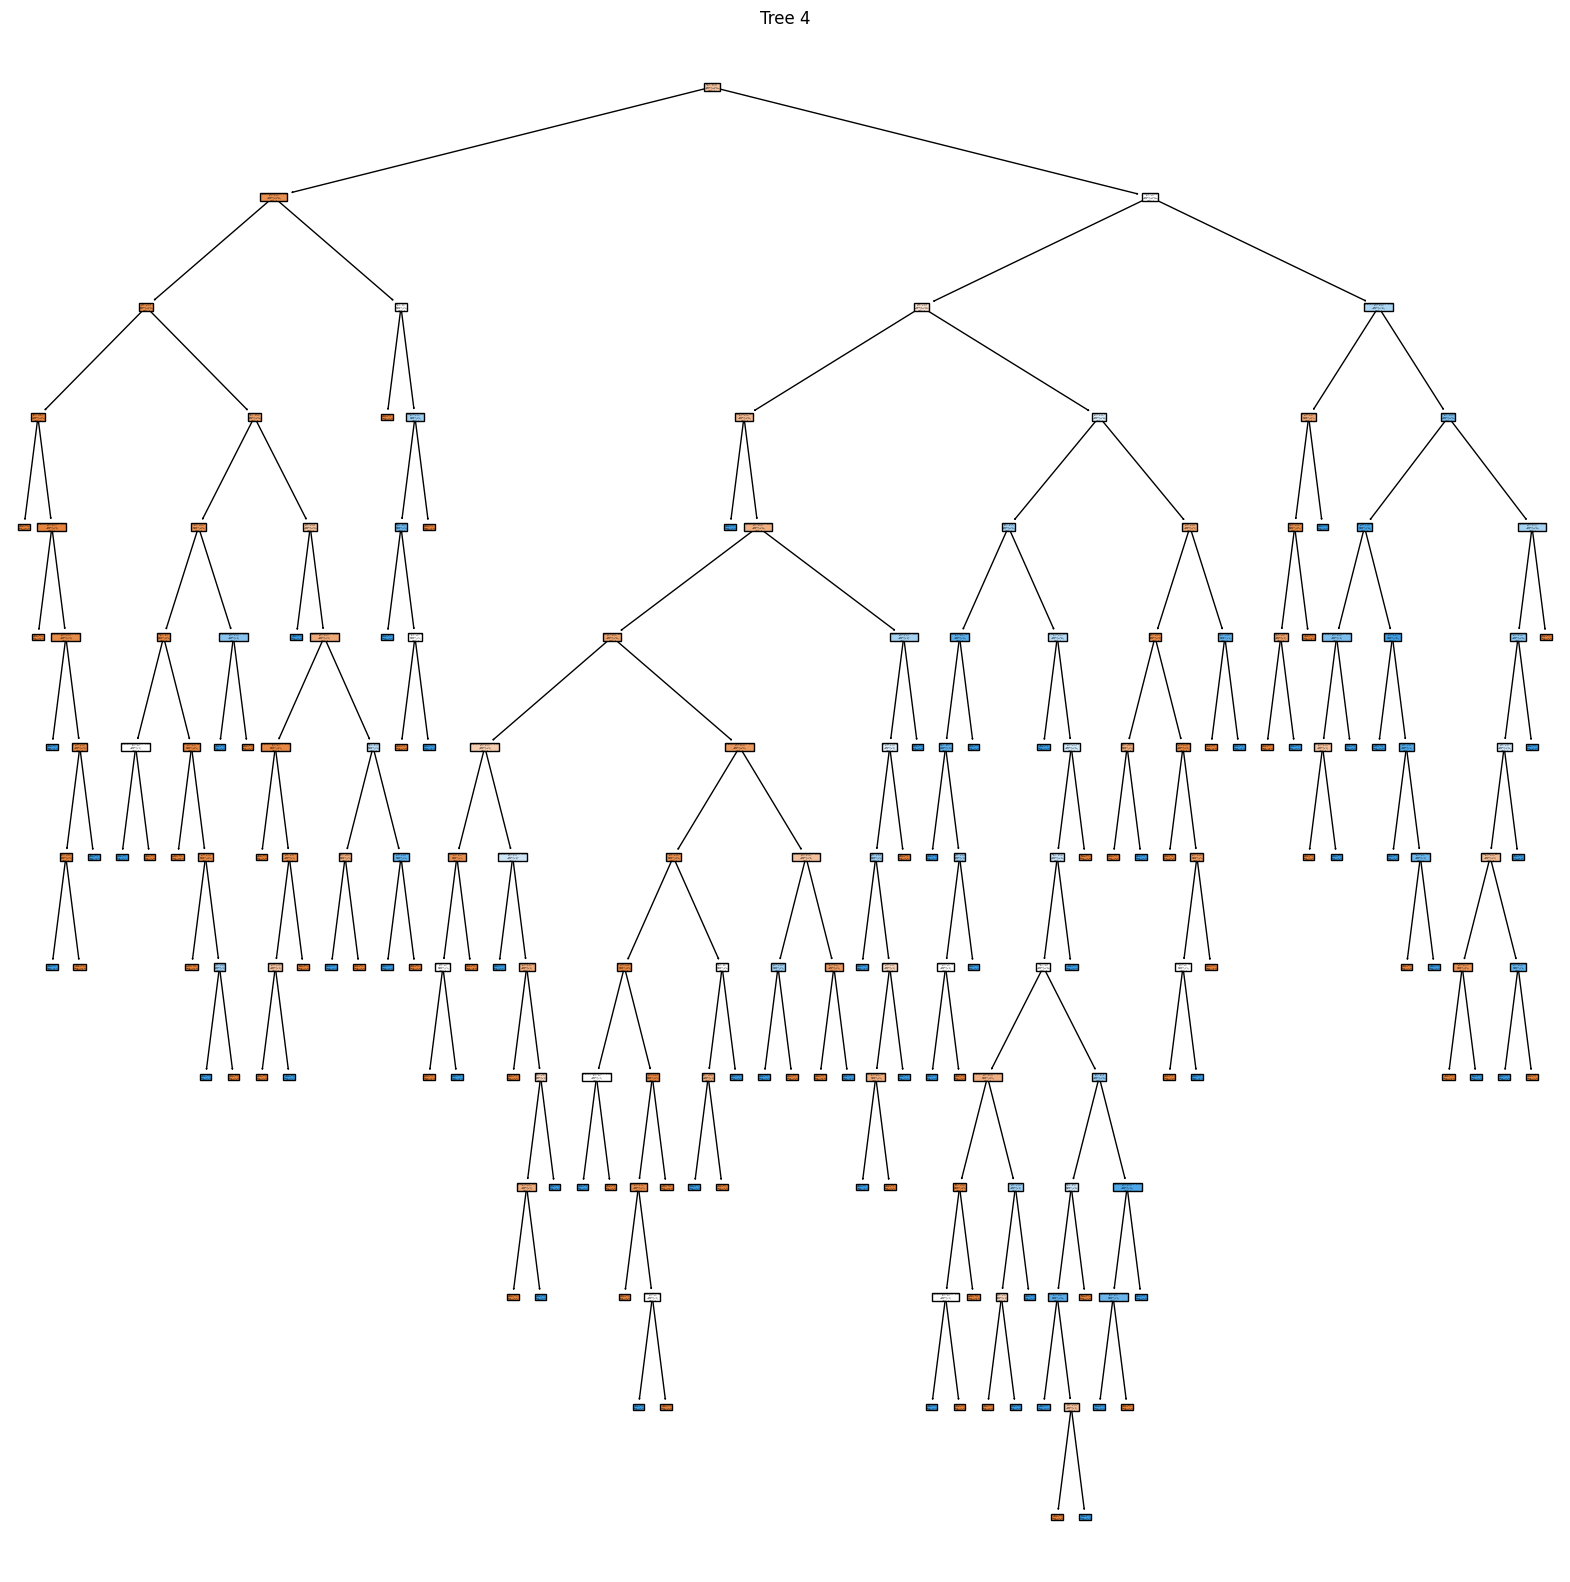

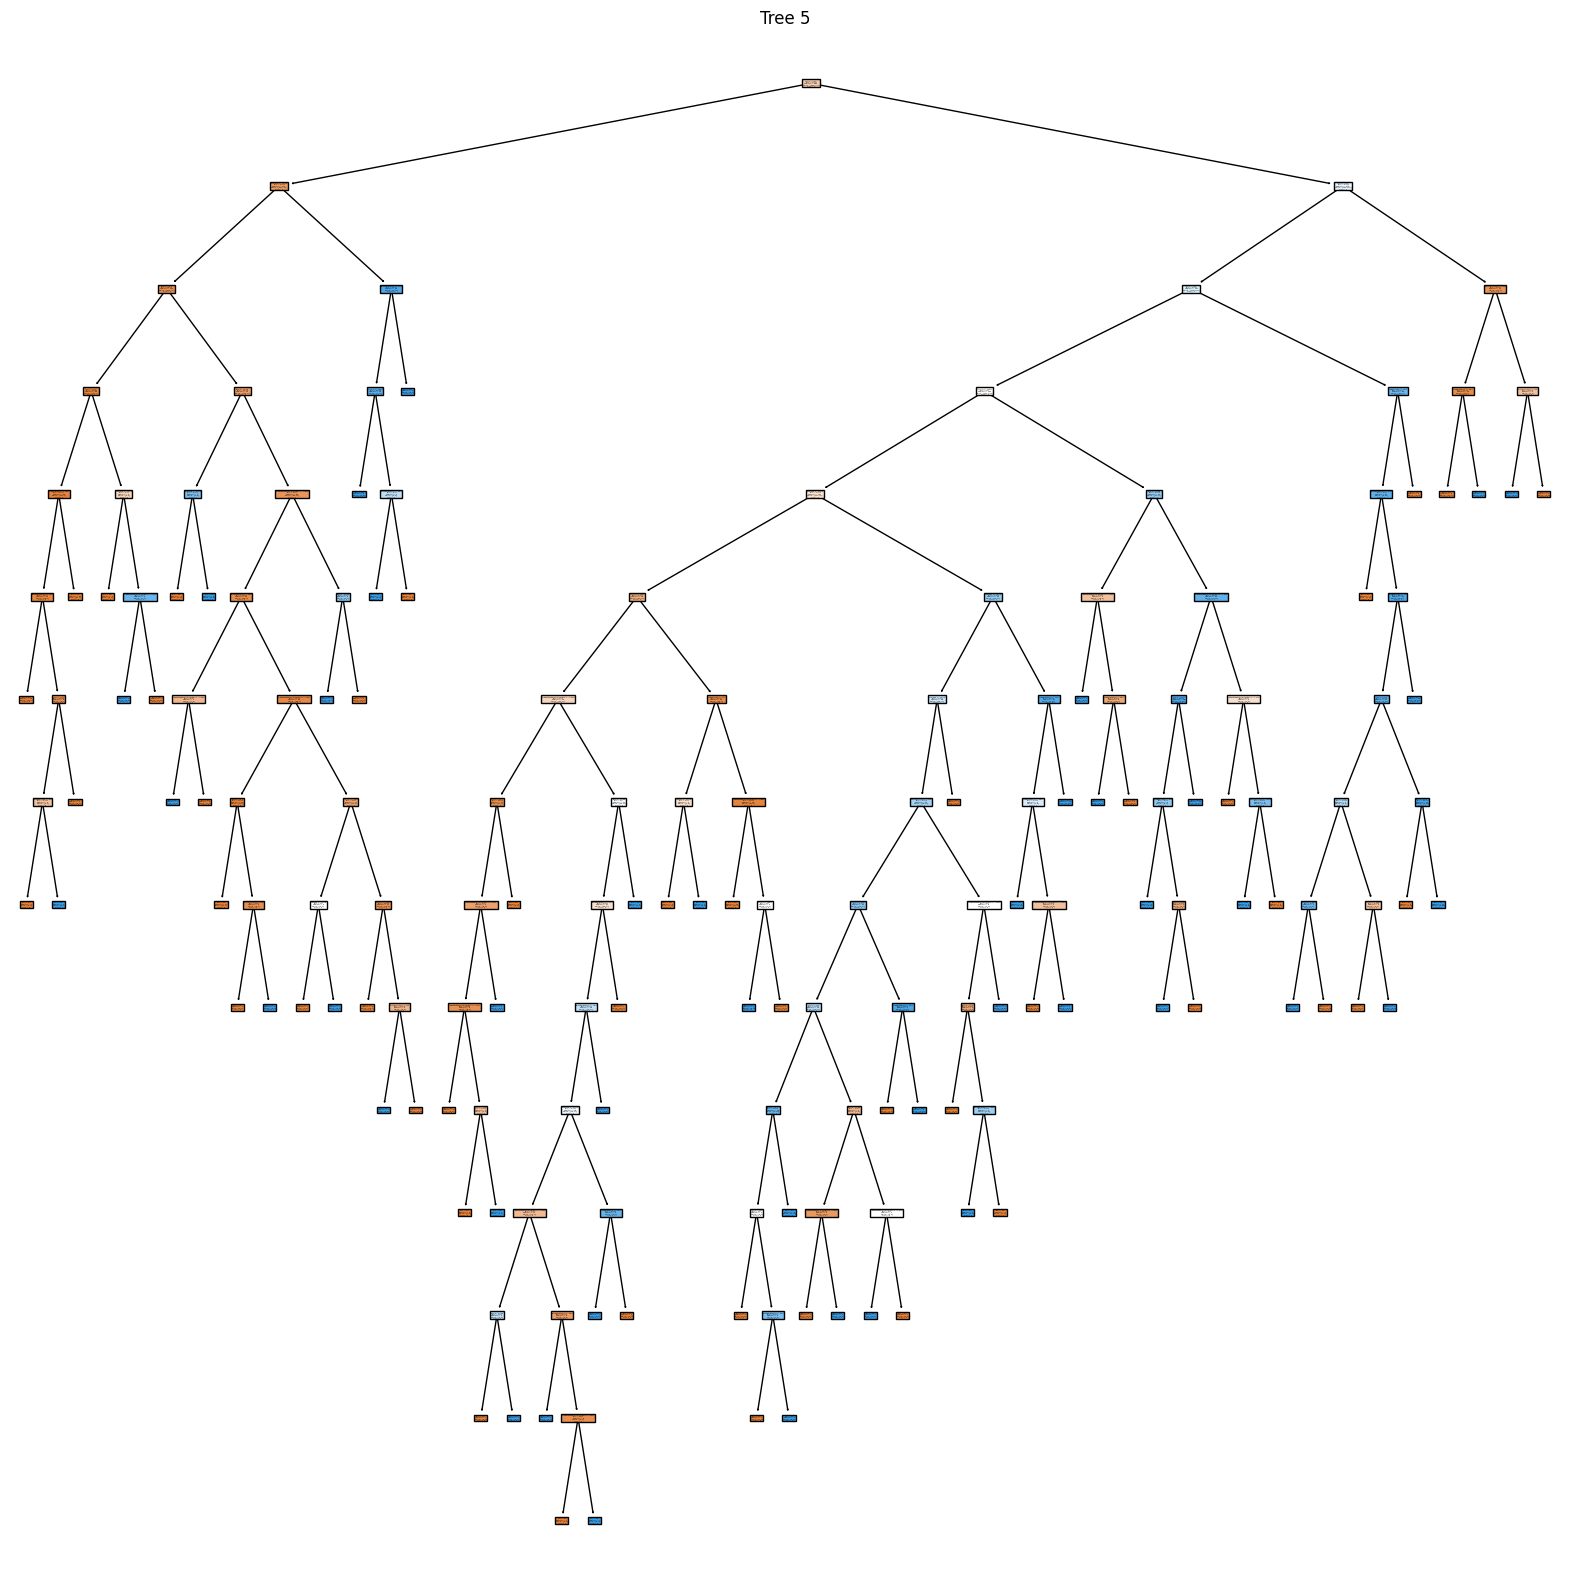

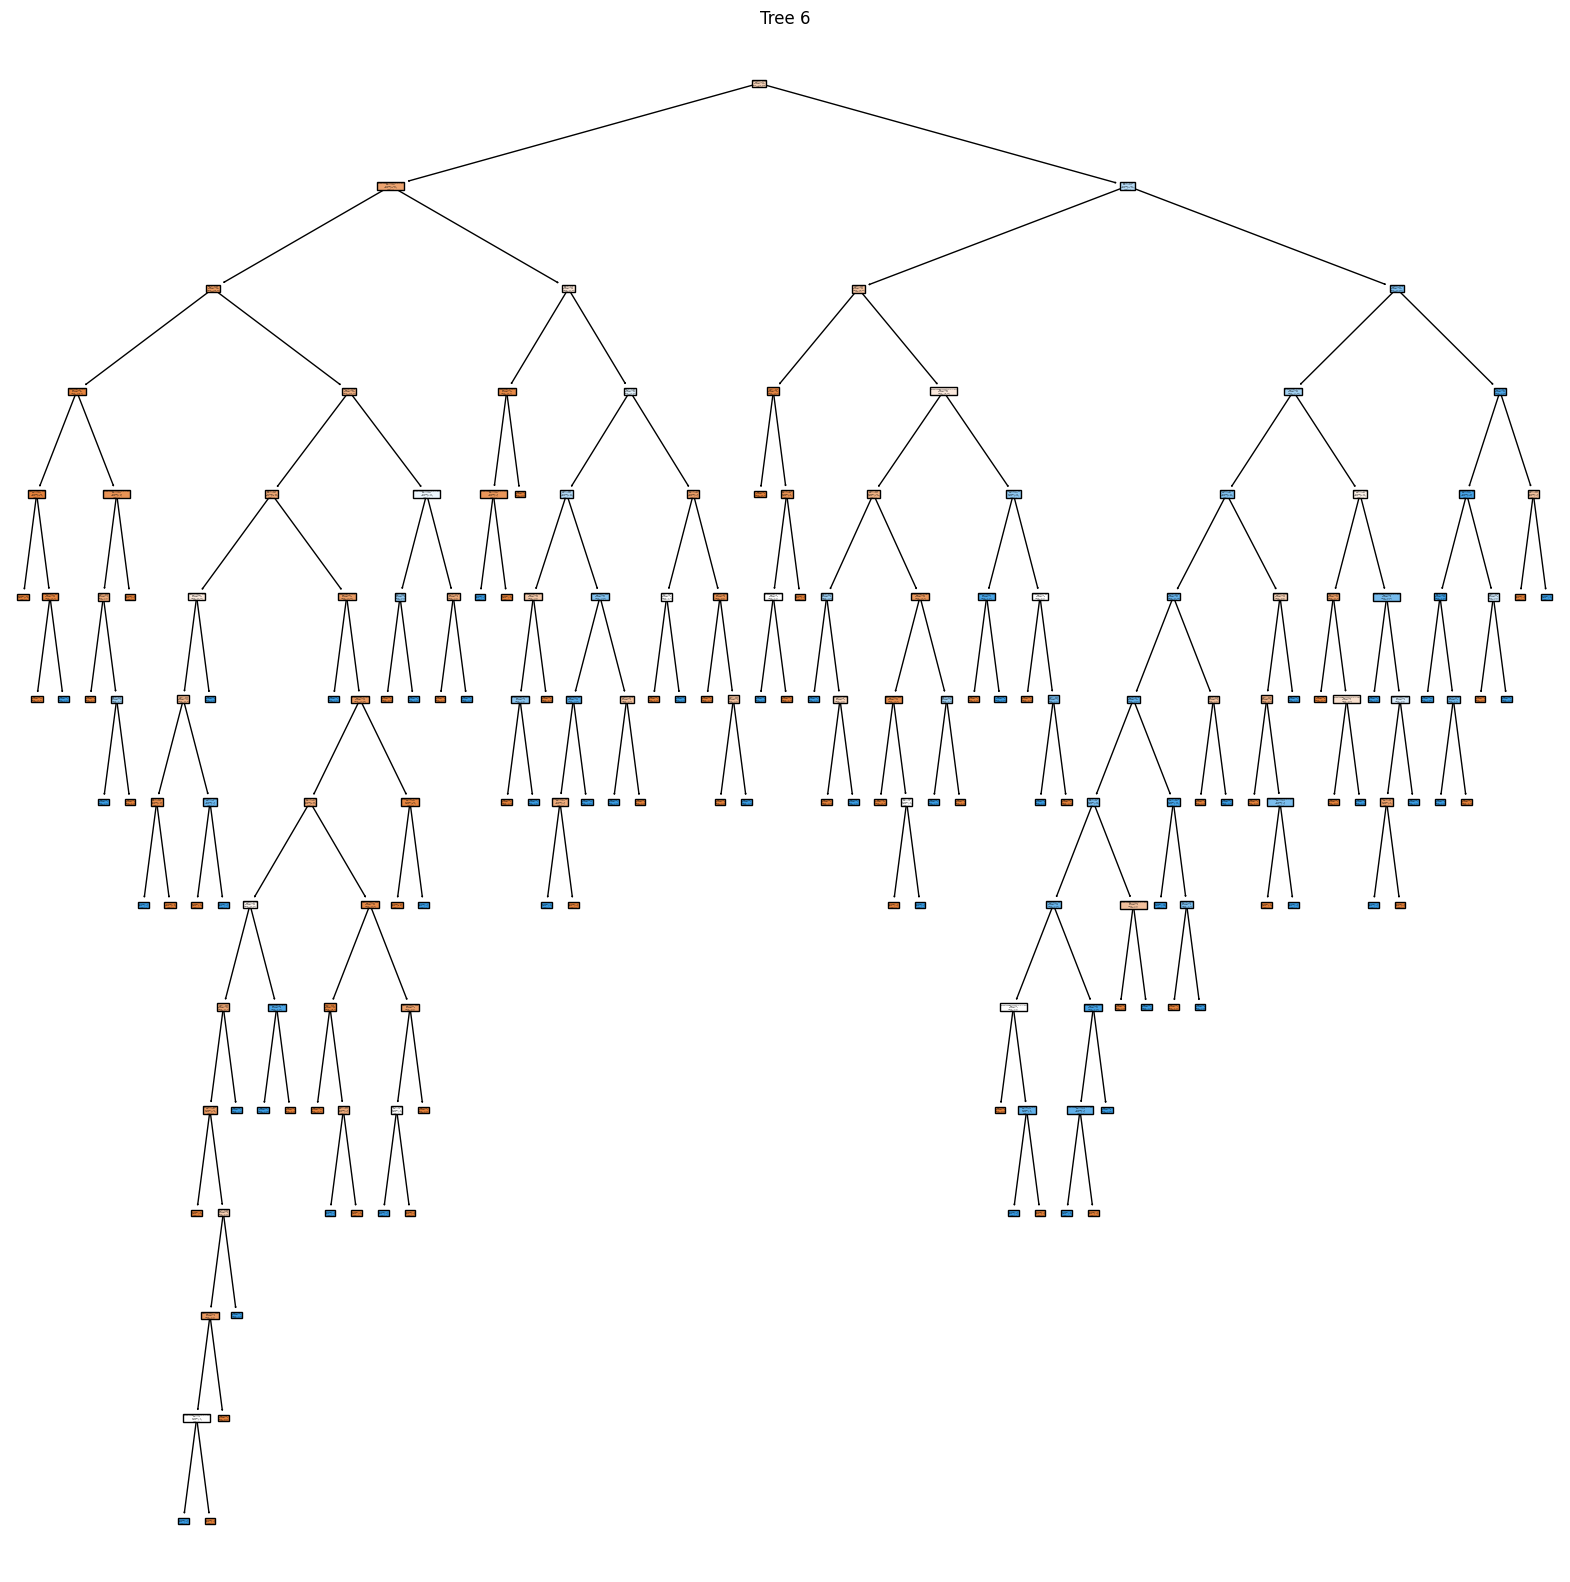

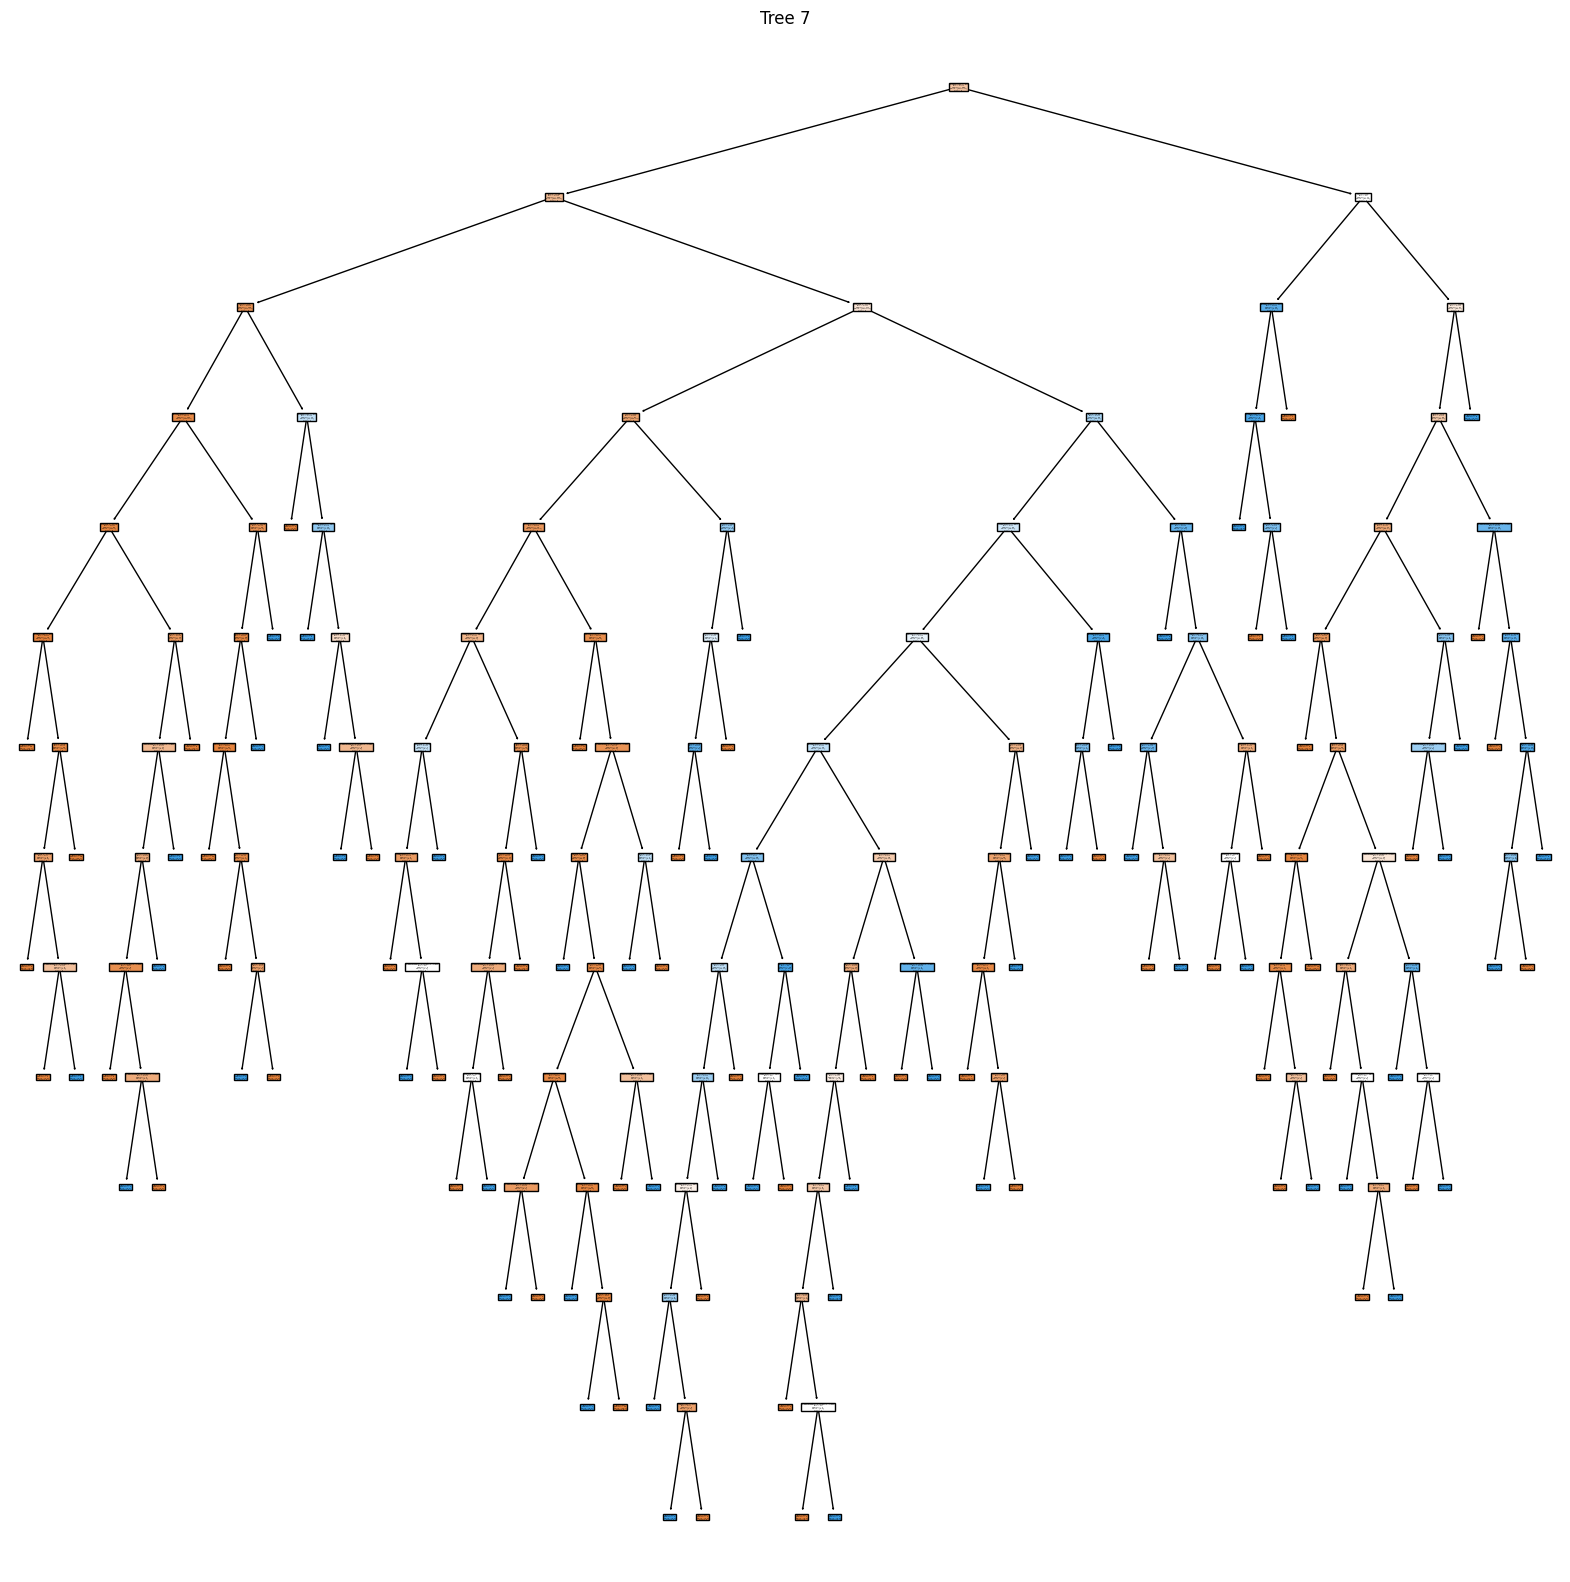

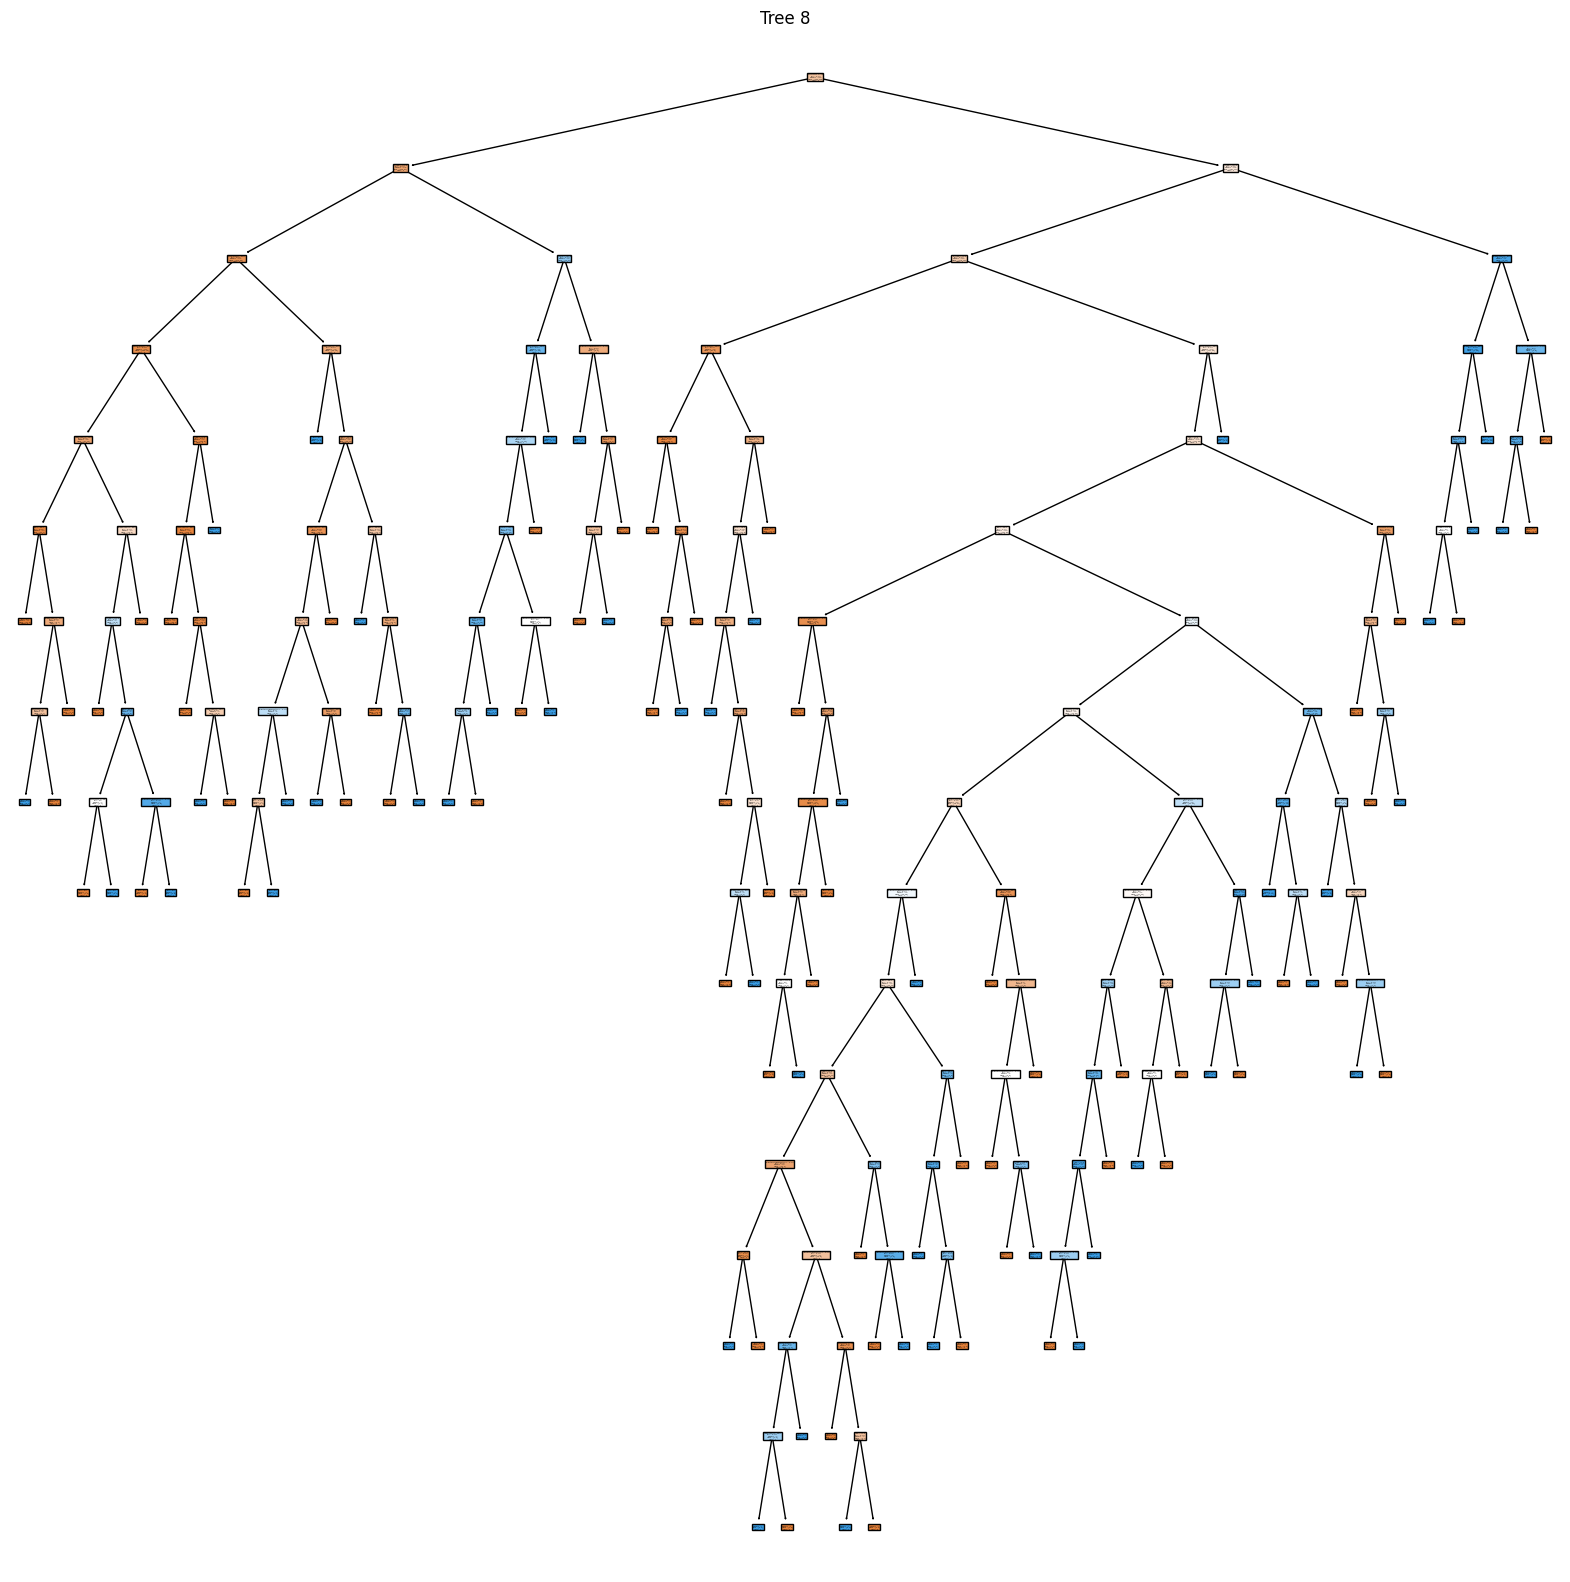

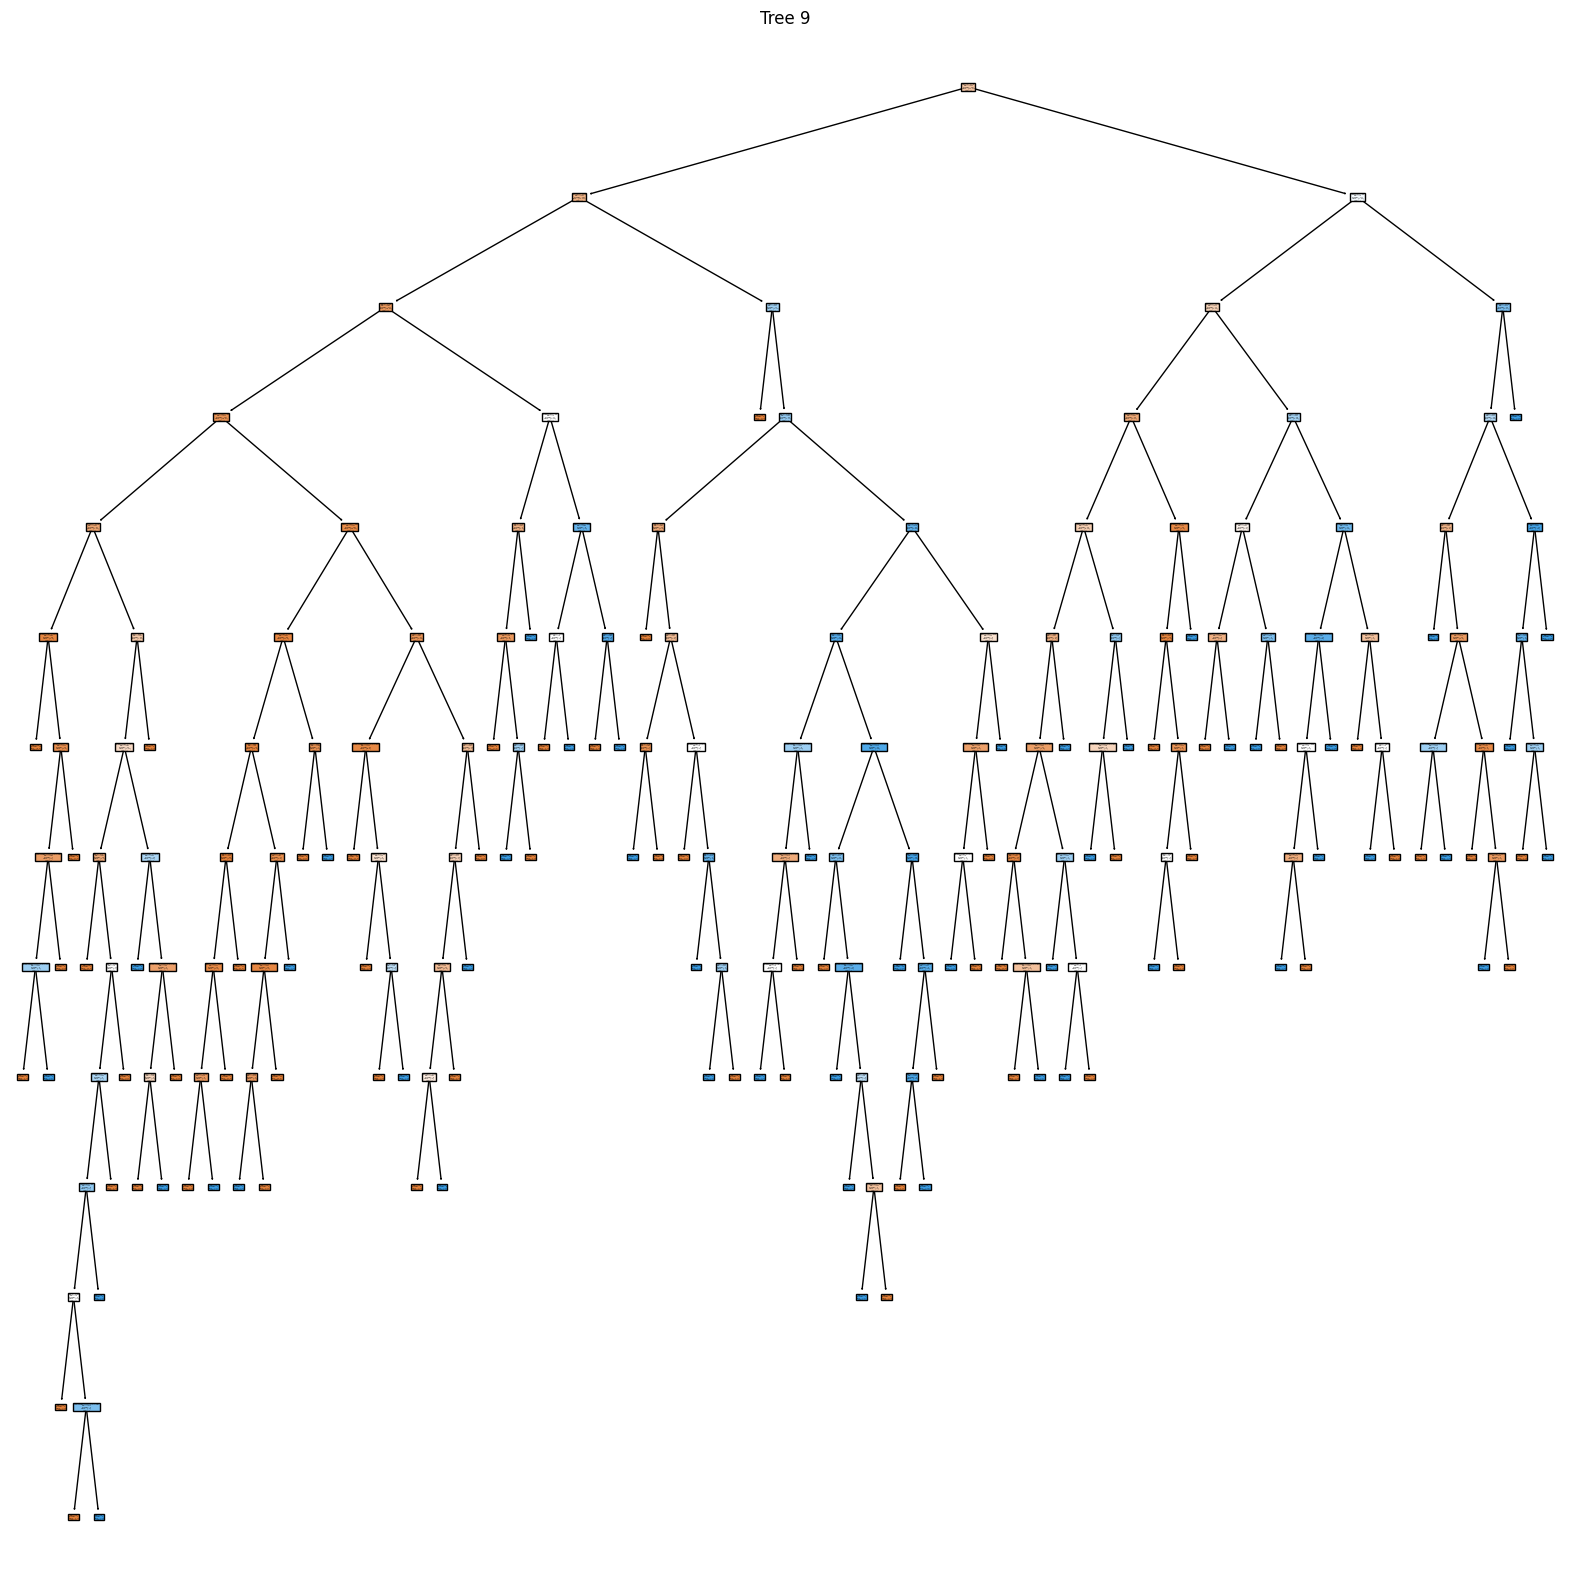

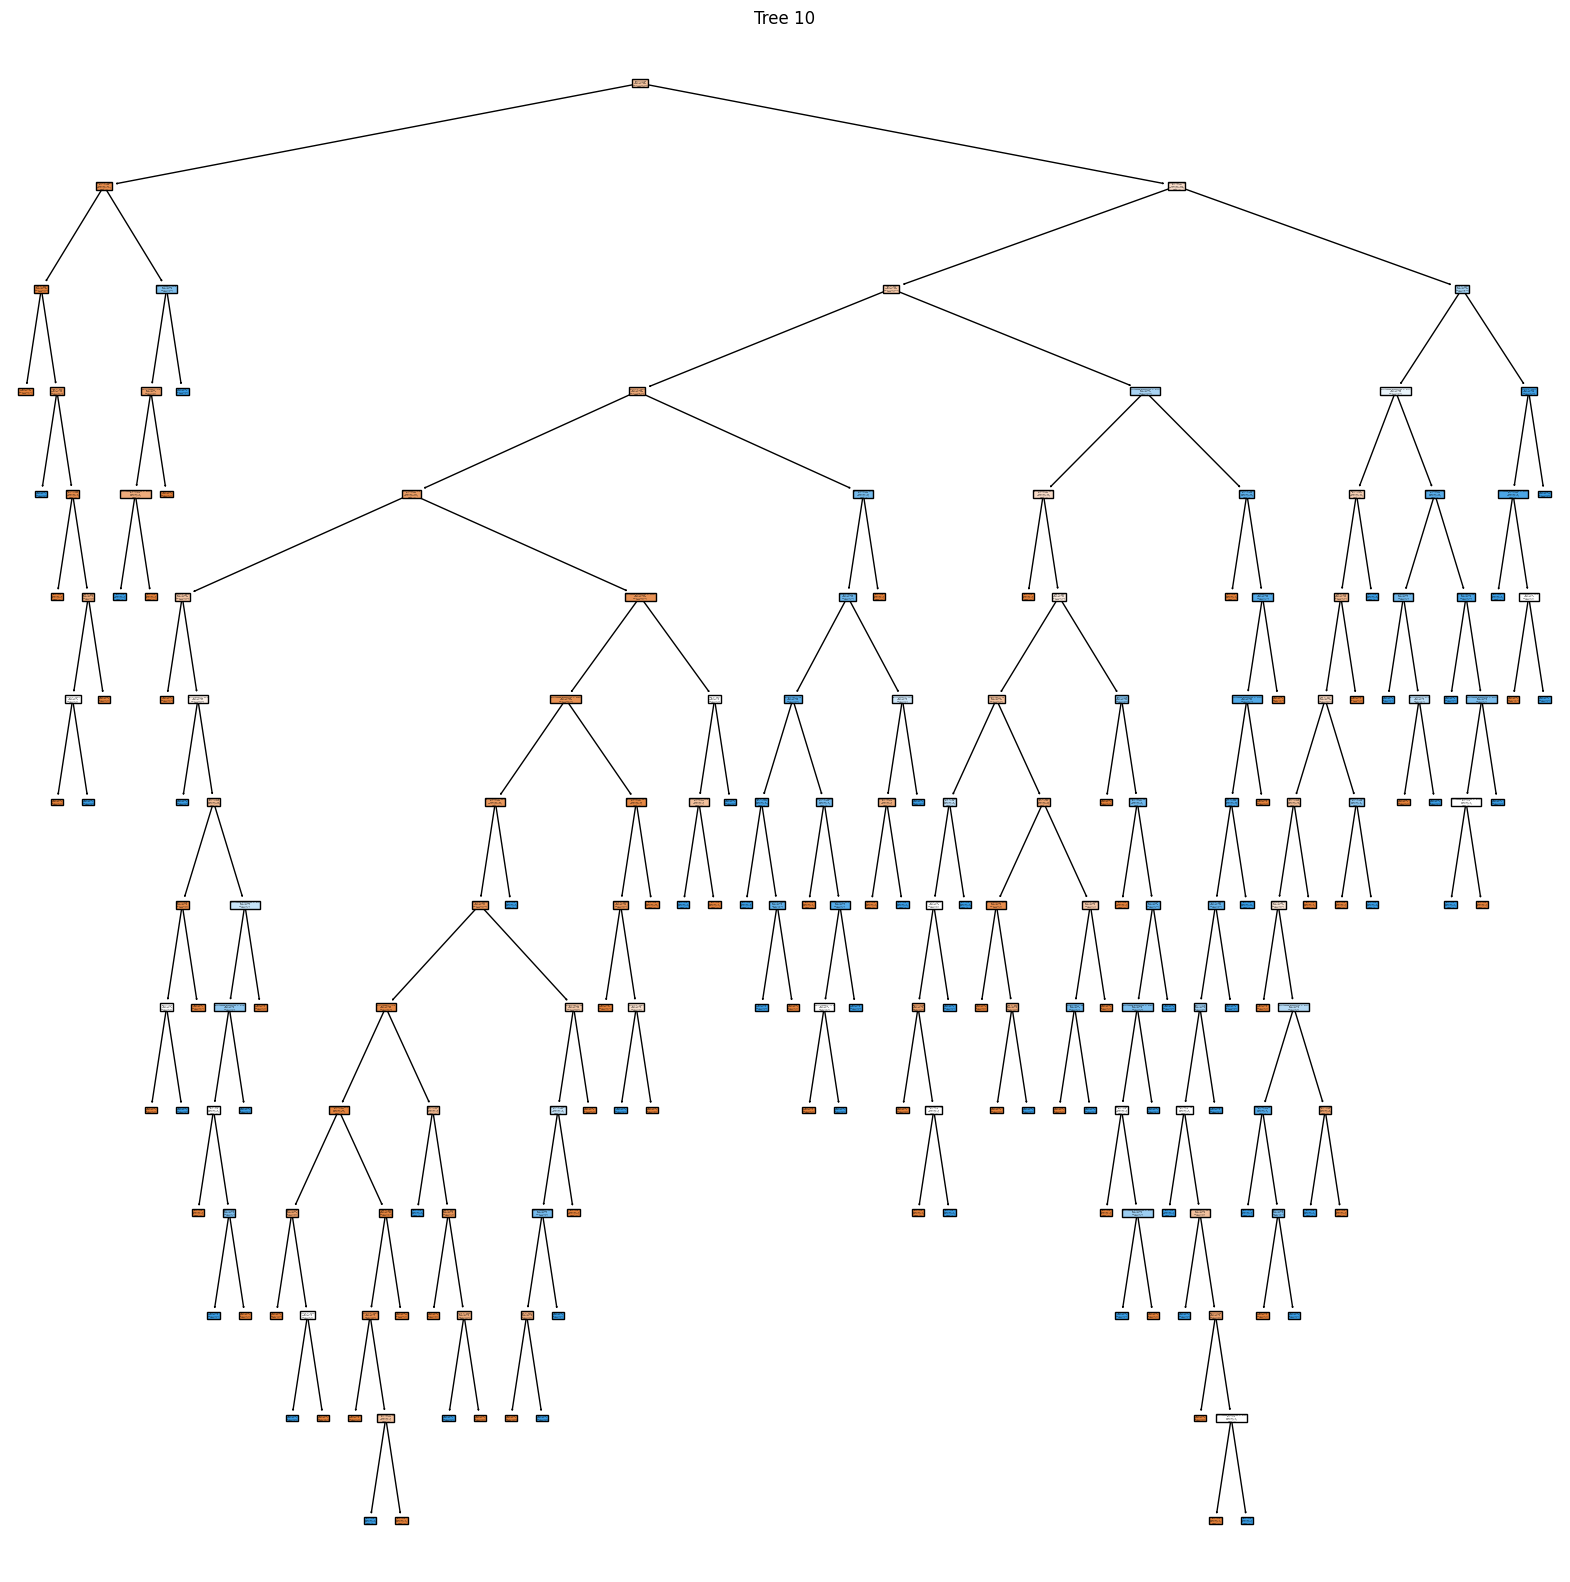

In [10]:
from sklearn import tree
import matplotlib.pyplot as plt

feature_names = df.columns[:-1]
# визуализация всех деревьев требует "больших" ресурсов и избыточа. я отобразил важность признаков выше.
# первые 10 деревьев
for i in range(10):
    plt.figure(figsize=(20,20))  
    tree.plot_tree(model.estimators_[i], 
                   feature_names=feature_names, 
                   class_names=['0','1'], 
                   filled=True)
    plt.title(f"Tree {i+1}")
    plt.show()


## Gradient_boosting accuracy: 0.7467532467532467

## Random_forest accuracy: 0.7207792207792207